In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on
# Pour vérifier que le code respecte la convention PEP8

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import matplotlib as mpl
import sys

import sklearn
from datetime import datetime
import re
import missingno as msno
from termcolor import colored, cprint

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## <span style='background:Thistle'>1. Importation des données et affichage de 3 lignes de chaque base</span>

In [4]:
database_name = ['olist_customers_dataset', 'olist_geolocation_dataset',
                 'olist_order_items_dataset', 'olist_order_payments_dataset',
                 'olist_order_reviews_dataset', 'olist_orders_dataset',
                 'olist_products_dataset', 'olist_sellers_dataset',
                 'product_category_name_translation']
chemin = ''
extension = '.csv'
database = []
for i in range(len(database_name)):
    cprint(' ---------------------------------------------------\
          ----------------------------------------')
    cprint('Importation de la base ', colored(database_name[i],
                                              'red', attrs=['bold']), ':')
    data = pd.read_csv(chemin + database_name[i] + extension)
    data = pd.DataFrame(data)
    database.append(data)
    print(' Les 3 premèeres lignes de cette base : ')
    display(data.head(3))
df_customers = database[0]
df_geo = database[1]
df_items = database[2]
df_payments = database[3]
df_reviews = database[4]
df_orders = database[5]
df_products = database[6]
df_sellers = database[7]
df_translation = database[8]

 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


 ---------------------------------------------------          ----------------------------------------
Importation de la base 
 Les 3 premèeres lignes de cette base : 


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [5]:
def types_variables(data):
    # Pie plot types de colonnes
    data.dtypes.value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Types de variables')
    plt.ylabel('')
    plt.show()

In [6]:
def taux_remplissage(data):
    # Pie plot taux de remplissage du jeu de données
    non_null = data.notna().mean().mean()
    est_null = data.isna().mean().mean()
    index = ['taux de remplissage', 'taux de valeurs manquantes']
    pdf = pd.DataFrame([non_null, est_null], index=index)
    pdf.plot.pie(autopct='%1.1f%%', subplots=True)
    plt.title('Taux de remplissage')
    plt.ylabel('')
    plt.legend(loc='center')
    plt.show()

In [7]:
def description_base(data, data_name):
    desc_base = []
    print('Analyse de la base ',
          colored(data_name, 'red', attrs=['bold']), ':')
    print(100*'-')
    print('Quelques informations sur la base :\n')
    print(data.info())
    print(100*'-')
    print('Il y a ', data.shape[0], 'lignes et ',
          data.shape[1], 'colonnes dans la base ', data_name)
    desc_base.append(data.shape[1])
    desc_base.append(data.shape[0])
    # données manquantes par colonnes
    print(100*'-')
    print('Le nombre de données manquantes par colonnes : \n',
          data.isna().sum())
    # données manquantes dans toute la base
    print(100*'-')
    print('Le nombre total de données manquantes est : \n',
          data.isna().sum().sum())
    desc_base.append(data.isna().sum().sum())
    # pourcentage des données manquantes
    print(100*'-')
    print('Le pourcentage des données manquantes est : \n',
          round(data.isna().mean().mean()*100, 2), '%')
    desc_base.append(round(data.isna().mean().mean()*100, 2))
    # nombre de doublons sur toutes les colonnes
    if data.duplicated().all():
        print('Il y a ', data.duplicated().sum(), 'lignes dupliquées')
        desc_base.append(data.duplicated().sum())
    else:
        print('Il n\'y a pas de doublons dans cette base')
        desc_base.append(0)
    print(colored(100*'*', 'blue'))
    types_variables(data)
    if data.isna().sum().sum() != 0:
        print(colored(100*'*', 'blue'))
        taux_remplissage(data)
    return desc_base

Analyse de la base  olist_customers_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
----------------------------------------------------------------------------------------------------
Il y a  99441 lignes et  5 colonnes dans la base  olist_customers_dataset
----------------------------------------------------------------------------------------------------

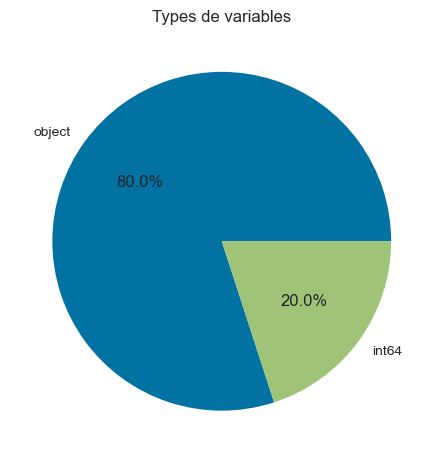

Analyse de la base  olist_geolocation_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
----------------------------------------------------------------------------------------------------
Il y a  1000163 lignes et  5 colonnes dans la base  olist_geolocation_dataset
-----------------------------------

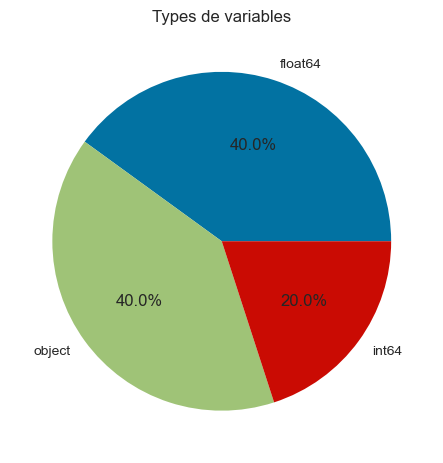

Analyse de la base  olist_order_items_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
----------------------------------------------------------------------------------------------------
Il y a  112650 lignes et  7 colonnes dans la base  olist_order_items_dataset


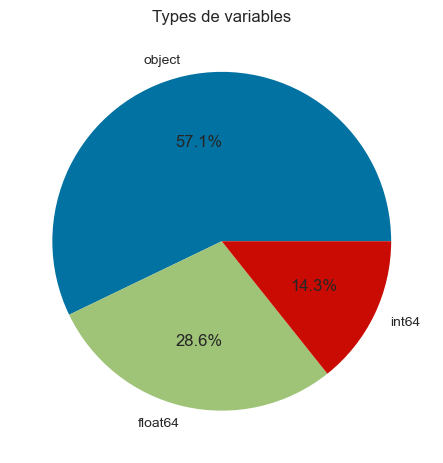

Analyse de la base  olist_order_payments_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
----------------------------------------------------------------------------------------------------
Il y a  103886 lignes et  5 colonnes dans la base  olist_order_payments_dataset
-----------------------------------------------------------------------------------------

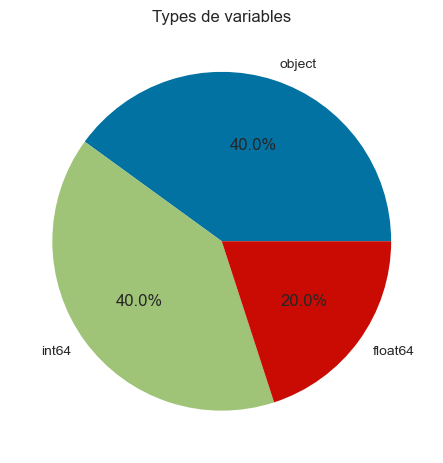

Analyse de la base  olist_order_reviews_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
----------------------------------------------------------------------------------------------------
Il y a  99224 lignes et  7 colonnes dans la base  olist_order_reviews_d

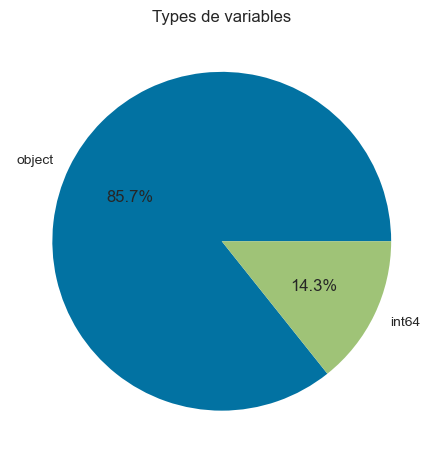

****************************************************************************************************


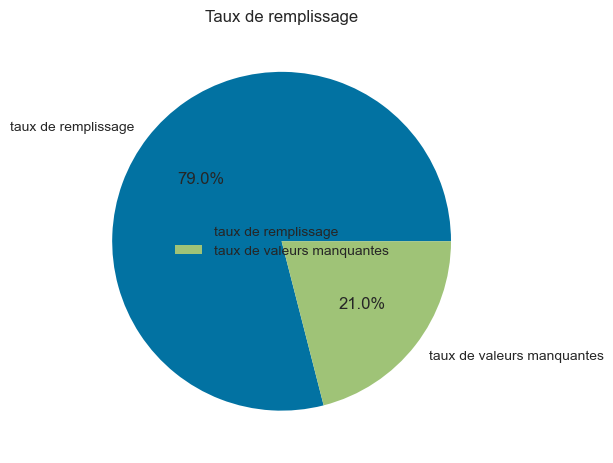

Analyse de la base  olist_orders_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
----------------------------------------------------------------------------

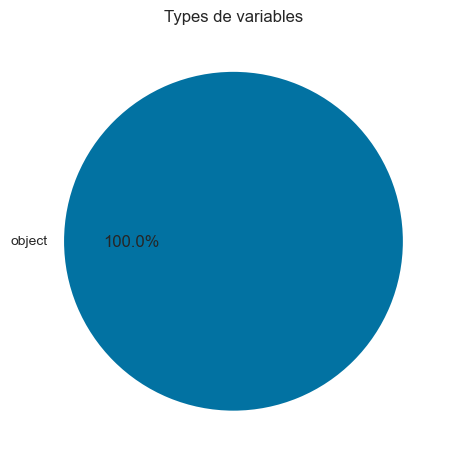

****************************************************************************************************


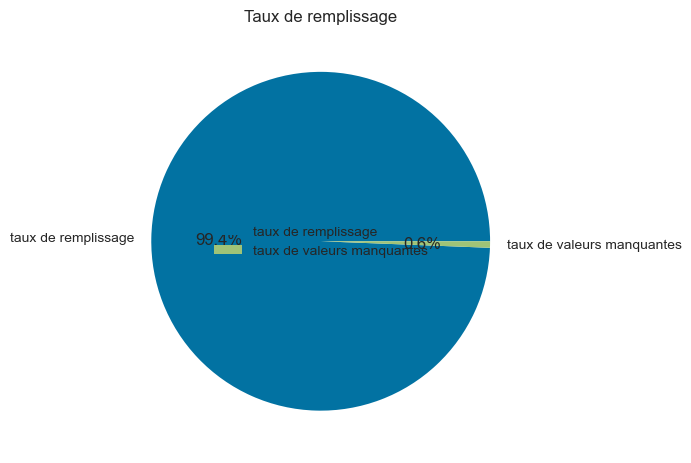

Analyse de la base  olist_products_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
-------------------------

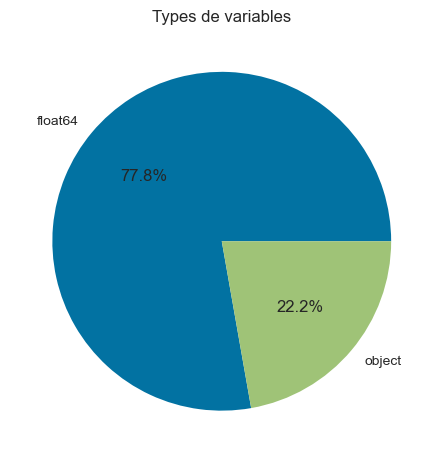

****************************************************************************************************


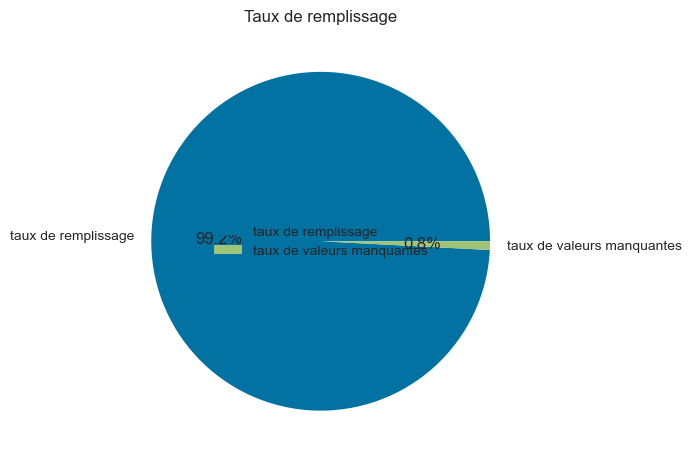

Analyse de la base  olist_sellers_dataset :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
----------------------------------------------------------------------------------------------------
Il y a  3095 lignes et  4 colonnes dans la base  olist_sellers_dataset
----------------------------------------------------------------------------------------------------
Le nombre de données manquantes par colonnes : 
 seller_id             

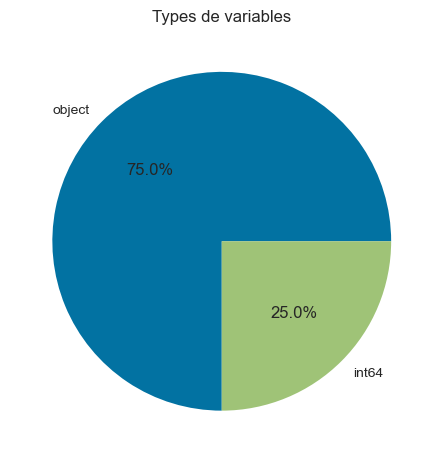

Analyse de la base  product_category_name_translation :
----------------------------------------------------------------------------------------------------
Quelques informations sur la base :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
----------------------------------------------------------------------------------------------------
Il y a  71 lignes et  2 colonnes dans la base  product_category_name_translation
----------------------------------------------------------------------------------------------------
Le nombre de données manquantes par colonnes : 
 product_category_name            0
product_category_name_english    0
dtype: int64
--------

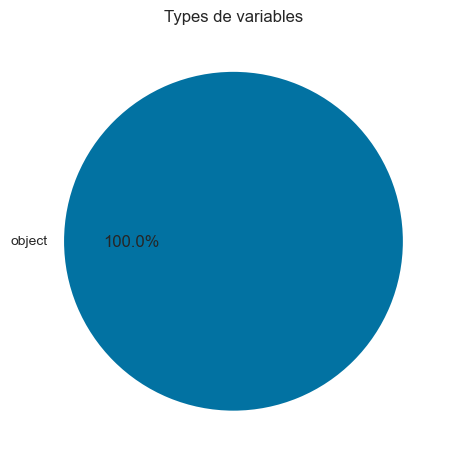

In [8]:
database = [df_customers, df_geo, df_items, df_payments,
            df_reviews, df_orders, df_products, df_sellers,
            df_translation]
description_jeu_donnees = []
for i in range(len(database)):
    desc_base = description_base(database[i], database_name[i])
    description_jeu_donnees.append(desc_base)
jeu_donnees = pd.DataFrame(description_jeu_donnees,
                           columns=['Colonnes', 'Lignes',
                                    'Nbre donnees manquantes',
                                    '% donnees manquantes', 'Nbre doublons'],
                           index=database_name)

In [9]:
print('Tableau récapitulatif')
jeu_donnees

Tableau récapitulatif


,Colonnes,Lignes,Nbre donnees manquantes,% donnees manquantes,Nbre doublons
olist_customers_dataset,5,99441,0,0.00,0
olist_geolocation_dataset,5,1000163,0,0.00,0
olist_order_items_dataset,7,112650,0,0.00,0
olist_order_payments_dataset,5,103886,0,0.00,0
olist_order_reviews_dataset,7,99224,145903,21.01,0
olist_orders_dataset,8,99441,4908,0.62,0
olist_products_dataset,9,32951,2448,0.83,0
olist_sellers_dataset,4,3095,0,0.00,0
product_category_name_translation,2,71,0,0.00,0


## <span style='background:Thistle'>2. Fusion des jeux de données</span>

In [10]:
# Fusion des jeux de données : df_customers et df_orders
# Variable de jointure : customer_id
data1 = pd.merge(df_customers, df_orders, on='customer_id')
data1.shape

(99441, 12)

In [11]:
# Fusion des jeux de données : data1 et  df_reviews
# Variable de jointure : order_id
data3 = pd.merge(data1, df_reviews, on='order_id', how='left')
data3.shape

(99992, 18)

In [12]:
# Fusion des jeux de données : data3 et  df_items
# Variable de jointure : order_id
data4 = pd.merge(data3, df_items, on='order_id', how='left')
data4.shape

(114092, 24)

In [13]:
# Fusion des jeux de données : data4 et  df_payments
# Variable de jointure : order_id
data5 = pd.merge(data4, df_payments, on='order_id', how='left')
data5.shape

(119143, 28)

In [14]:
# Fusion des jeux de données : data5 et  df_products
# Variable de jointure : product_id
data6 = pd.merge(data5, df_products, on='product_id', how='left')
data6.shape

(119143, 36)

In [15]:
# Fusion des jeux de données : data6 et  df_translation
# Variable de jointure : product_category_name
data7 = pd.merge(data6, df_translation, on='product_category_name', how='left')
data7.shape

(119143, 37)

In [16]:
# Fusion des jeux de données : data7 et  df_sellers
# Variable de jointure : seller_id
data = pd.merge(data7, df_sellers, on='seller_id', how='left')
data.shape

(119143, 40)

In [17]:
# liste des colonnes après jointure
liste_Colonnes = data.columns.tolist()
liste_Colonnes

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

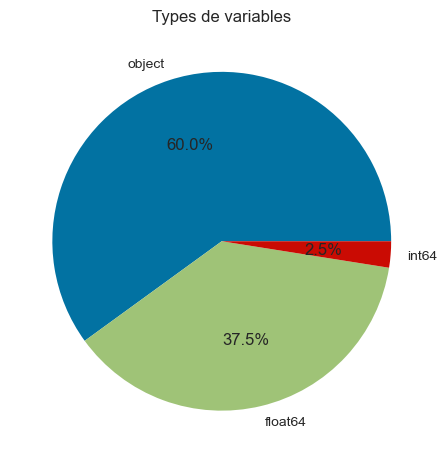

In [18]:
types_variables(data)

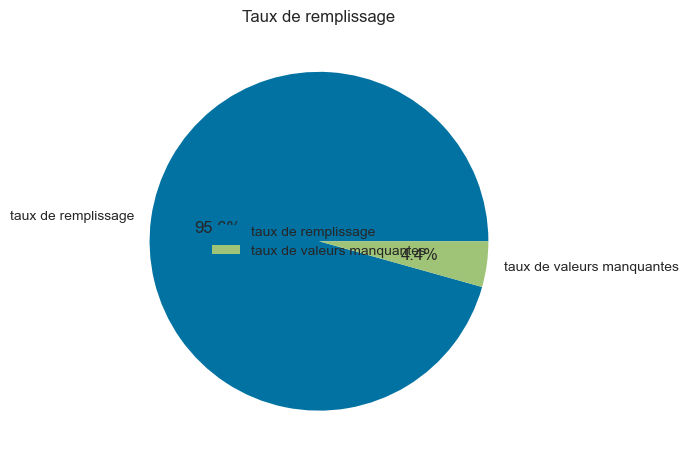

In [19]:
taux_remplissage(data)

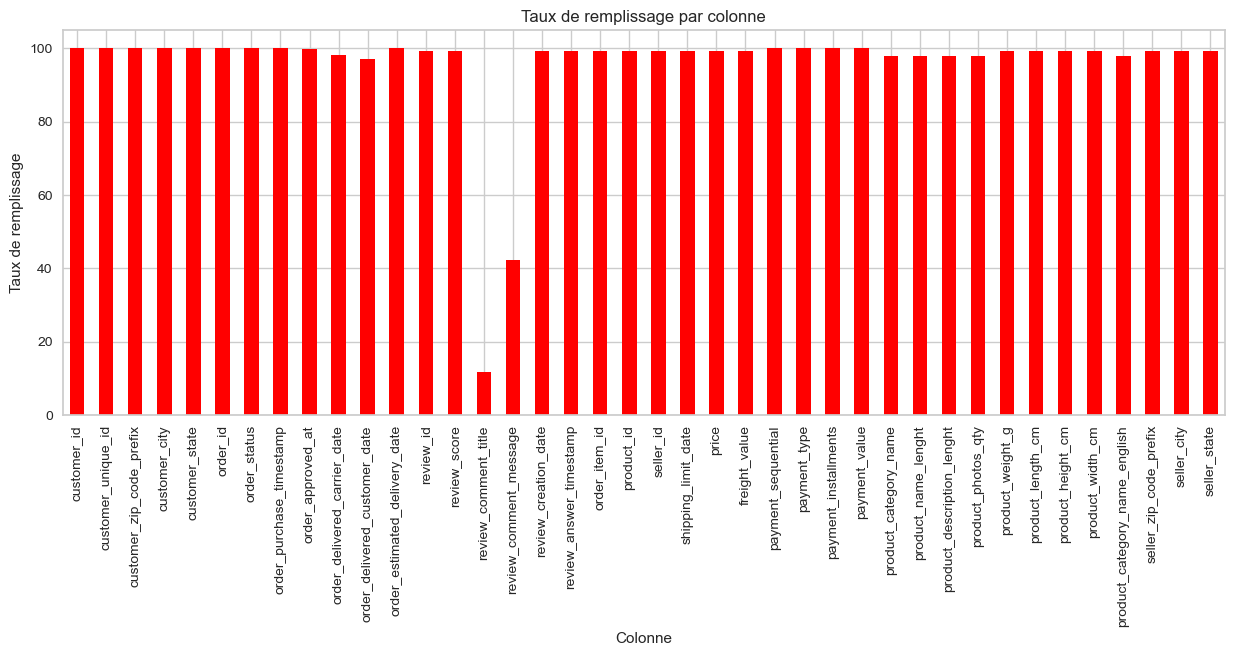

In [20]:
# Calcul du taux de remplissage  par colonne
plt.figure(figsize=(15, 5))
G = gridspec.GridSpec(1, 1)
ax = plt.subplot(G[0, :])
taux_remplissage = 100-data.isna().mean()*100
ax = taux_remplissage.plot(kind='bar', color='red')
ax.set_title('Taux de remplissage par colonne')
ax.set_xlabel('Colonne')
ax.set_ylabel('Taux de remplissage')
ax.grid(True)
plt.show()

## <span style='background:Thistle'>3. Quelques statistiques</span>

In [21]:
s = 'Nous avons {} différents clients, {} différentes commandes, ' + \
    '{} différents produits et {} différents vendeurs'
print(s.format(data['customer_unique_id'].nunique(),
      data['order_id'].nunique(),
      data['product_id'].nunique(),
      data['seller_id'].nunique()))

Nous avons 96096 différents clients, 99441 différentes commandes, 32951 différents produits et 3095 différents vendeurs


In [22]:
print("Les commandes ont été passées entre ",
      min(data['order_purchase_timestamp']),
      " et ", max(data['order_purchase_timestamp']))

Les commandes ont été passées entre  2016-09-04 21:15:19  et  2018-10-17 17:30:18


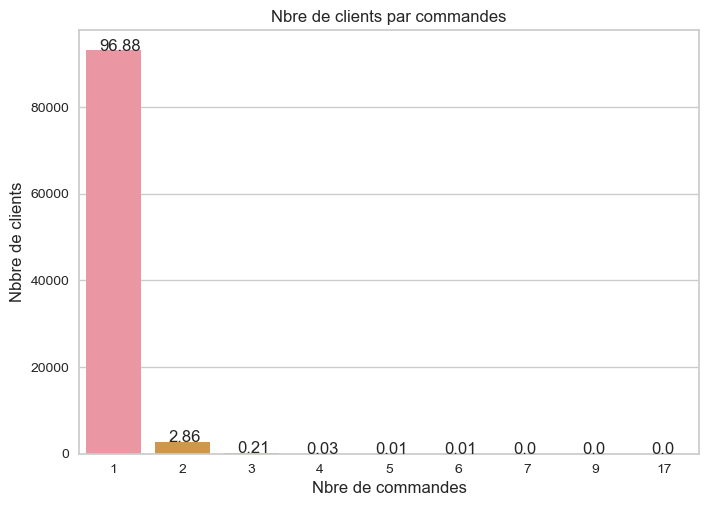

In [23]:
# Répartition du nbre de clients par nbre de commandes
ax = plt.gca()
nbre_client = df_customers['customer_unique_id'].nunique()
nbre_commande_client = df_customers.groupby(
    'customer_unique_id').size().value_counts()
df_cmde = pd.DataFrame(
    {'Nbre_commandes': nbre_commande_client.index,
     'Nbre_clients': nbre_commande_client.values})
df_cmde['pourc'] = round(
    (df_cmde['Nbre_clients'])*100/nbre_client, 2)


sns.barplot(x='Nbre_commandes', y='Nbre_clients',
            data=df_cmde, ax=ax)
ax.set_xlabel('Nbre de commandes', fontsize=12)
ax.set_ylabel('Nbbre de clients', fontsize=12)
ax.set_title('Nbre de clients par commandes')
for i, p in enumerate(ax.patches):
    ax.text(
        p.get_width()/4+p.get_x(),
        p.get_height()+p.get_y(),
        df_cmde['pourc'][i]
        )
plt.show()

Nous remarquons bien que environ 97% des clients ont passé une seule commande sur le site

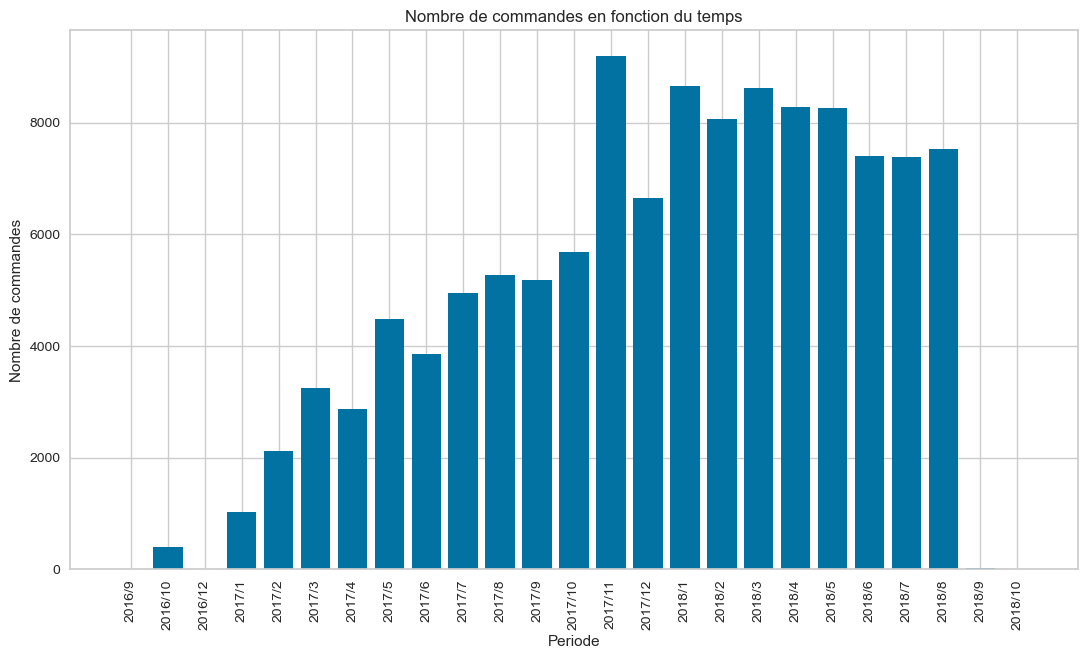

In [24]:
time = data.loc[:, ['order_id']]
time['order_purchase_year'] = pd.to_datetime(data[
    'order_purchase_timestamp']).dt.year
time['order_purchase_month'] = pd.to_datetime(data[
    'order_purchase_timestamp']).dt.month

time = time.groupby(
    ['order_purchase_month', 'order_purchase_year']).count().reset_index()
time["period"] = time["order_purchase_year"].astype(str) + "/" + time[
    "order_purchase_month"].astype(str)
time.columns = ["order_purchase_month", "order_purchase_year",
                "Number of order", "period"]
time = time.sort_values(by=['order_purchase_year', 'order_purchase_month'])

# Nbre de commandes en fonction du temps
(fig, ax) = plt.subplots(figsize=(13, 7))
plt.title("Nombre de commandes en fonction du temps")
ax = plt.bar(range(0, time["period"].nunique()),
             time["Number of order"].values)
plt.xticks(range(0, time["period"].nunique()),
           time["period"].unique(), rotation=90)
plt.xlabel("Periode")
plt.ylabel("Nombre de commandes")
plt.show()

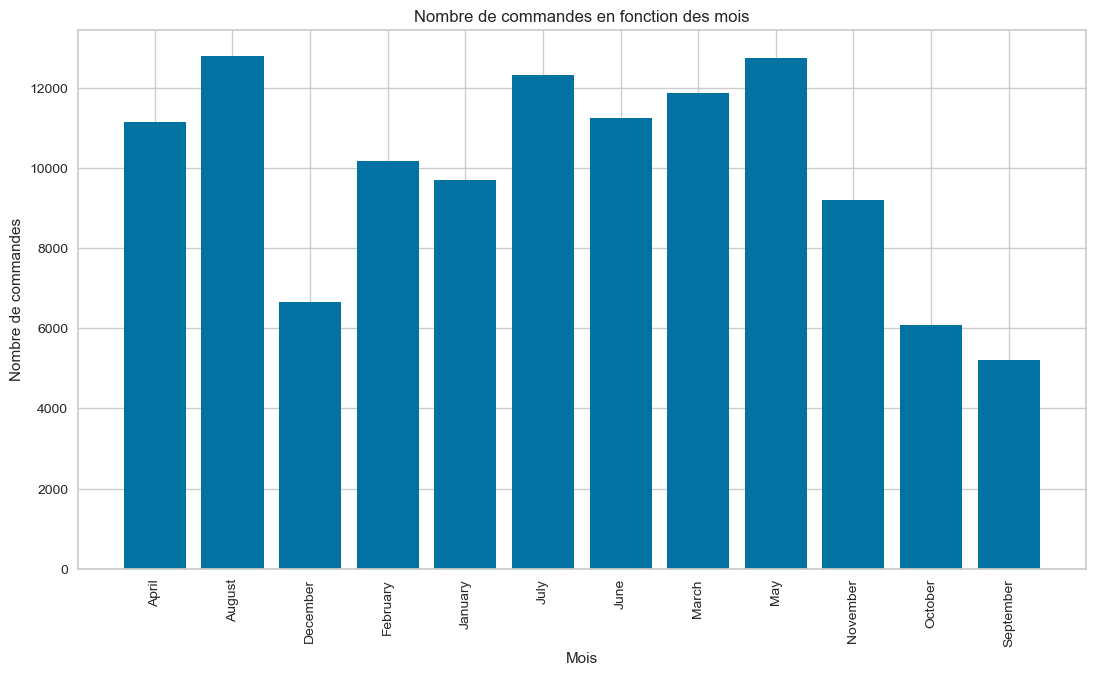

In [25]:
time_month = data.loc[:, ['order_id']]
time_month['order_purchase_month'] = pd.to_datetime(
    data['order_purchase_timestamp']).dt.month_name()
time_month = time_month.groupby('order_purchase_month').count().reset_index()
time_month.columns = ["order_purchase_month", "Number of order"]

# Nombre de commandes en fonction des mois
(fig, ax) = plt.subplots(figsize=(13, 7))
plt.title("Nombre de commandes en fonction des mois")
ax = plt.bar(range(0, time_month["order_purchase_month"].nunique()),
             time_month["Number of order"].values)
plt.xticks(range(0, time_month["order_purchase_month"].nunique()),
           time_month["order_purchase_month"].unique(), rotation=90)
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.show()

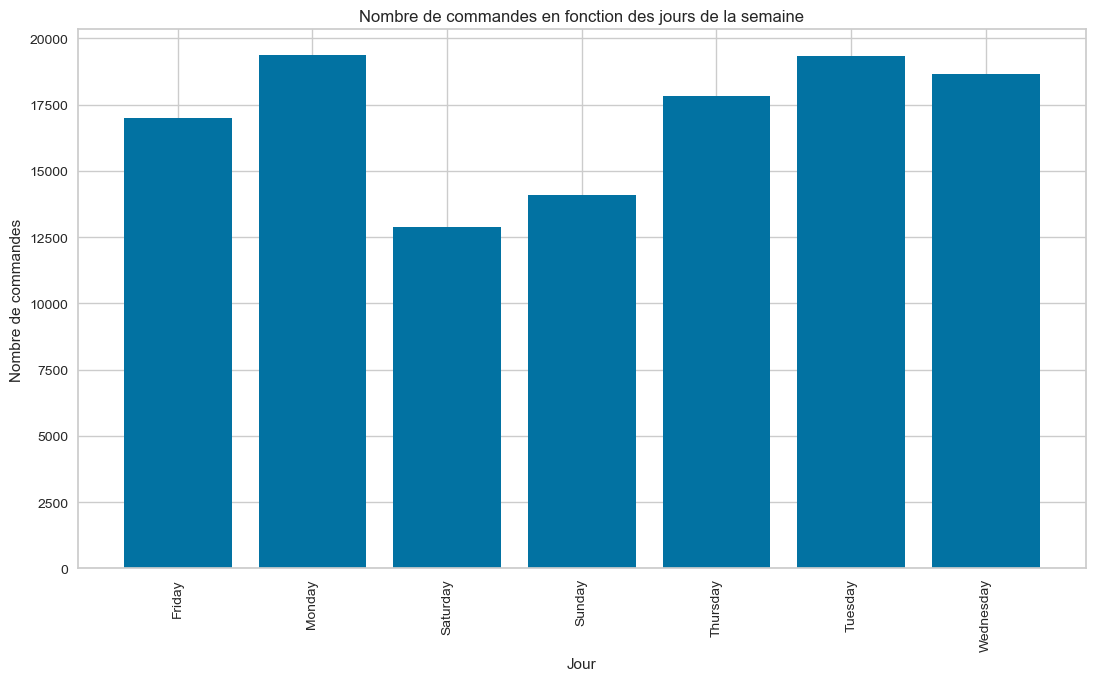

In [26]:
time_day = data.loc[:, ['order_id']]
time_day['order_purchase_day'] = pd.to_datetime(
    data['order_purchase_timestamp']).dt.day_name()
time_day = time_day.groupby('order_purchase_day').count().reset_index()
time_day.columns = ["order_purchase_day", "Number of order"]

# Nombre de commandes en fonction des jours de la semaine
(fig, ax) = plt.subplots(figsize=(13, 7))
plt.title("Nombre de commandes en fonction des jours de la semaine")
ax = plt.bar(range(0, time_day["order_purchase_day"].nunique()),
             time_day["Number of order"].values)
plt.xticks(range(0, time_day["order_purchase_day"].nunique()),
           time_day["order_purchase_day"].unique(), rotation=90)
plt.xlabel("Jour")
plt.ylabel("Nombre de commandes")
plt.show()

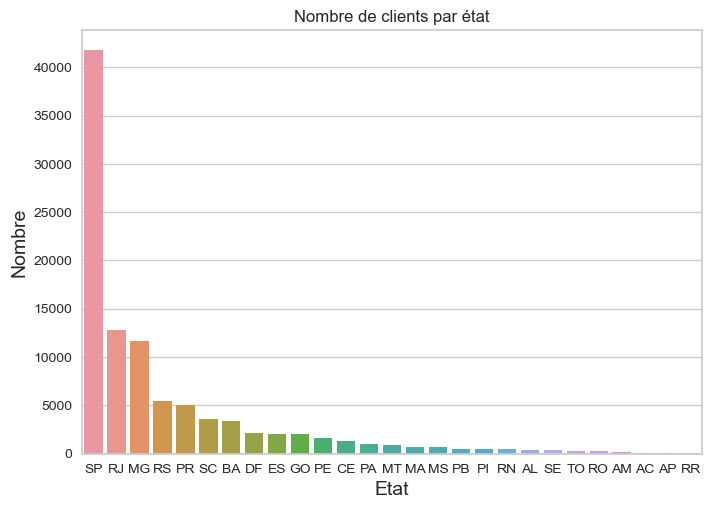

In [27]:
# Nombre de clients par état
clients_par_etat = data.groupby(
    ['customer_id', 'customer_state']).count().reset_index()
sns.countplot(x=clients_par_etat.customer_state, data=clients_par_etat,
              order=clients_par_etat.customer_state.value_counts().index)
plt.title('Nombre de clients par état')
plt.ylabel('Nombre', fontsize=14)
plt.xlabel('Etat', fontsize=14)

plt.show()

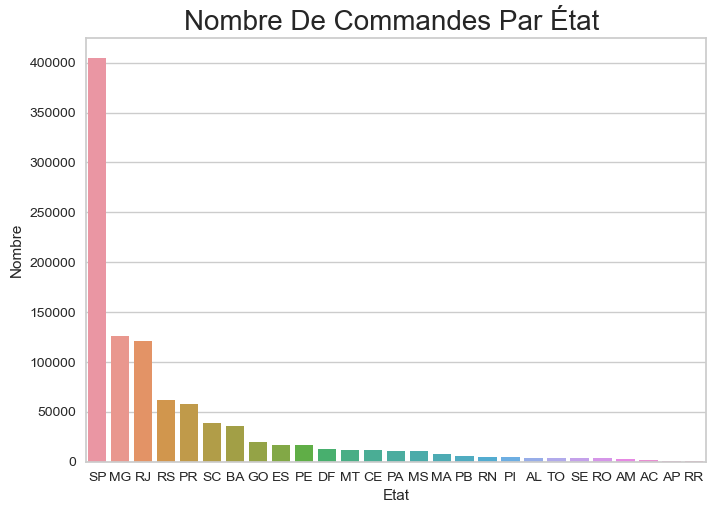

In [28]:
# nombre de commandes par état
sns.countplot(x='geolocation_state', data=df_geo,
              order=df_geo['geolocation_state'].value_counts(
              ).sort_values(ascending=False).index)

plt.title('Nombre de commandes par état '.title(),
          fontsize=20)
plt.ylabel('Nombre'.title())
plt.xlabel('Etat'.title())


plt.show()

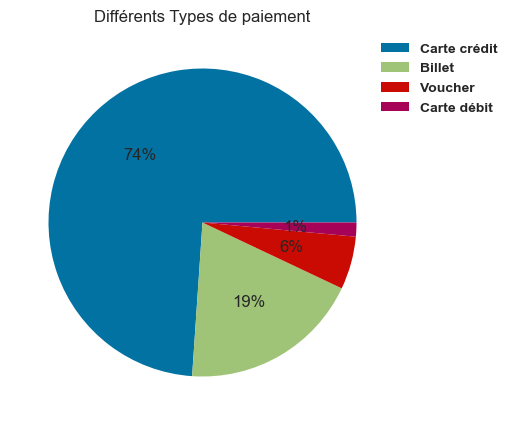

In [29]:
# Répartition des différents mode de paiements
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect='equal'))
explode = (0.1, 0, 0, 0)
legend = ['Carte crédit', 'Billet', 'Voucher',
          'Carte débit']

p = df_payments['payment_type'][df_payments['payment_type']
                                != 'not_defined'].value_counts()
p.plot(kind="pie", legend=False, labels=None, autopct='%1.0f%%',  ax=ax)
ax.legend(legend, loc='best', shadow=True,
          prop={'weight': 'bold'},
          bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.title('Différents Types de paiement')
plt.ylabel("")
plt.show()

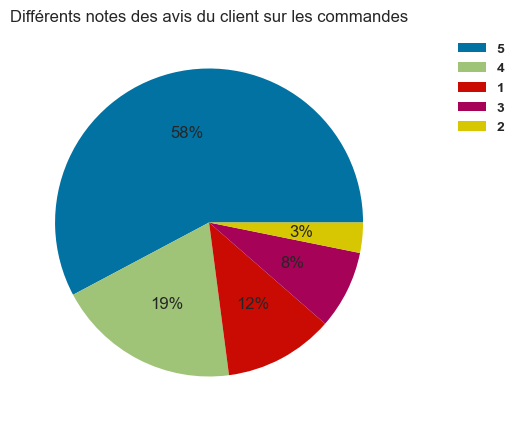

In [30]:
# Répartition des différents mode de paiements
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect='equal'))
explode = (0.1, 0, 0, 0)
legend = ['5', '4', '1', '3', '2']

p = df_reviews['review_score'][df_reviews['review_score']
                               != 'not_defined'].value_counts()
p.plot(kind="pie", legend=True, labels=None, autopct='%1.0f%%',  ax=ax)
ax.legend(legend, loc='best', shadow=True,
          prop={'weight': 'bold'},
          bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.title('Différents notes des avis du client sur les commandes')
plt.ylabel("")
plt.show()

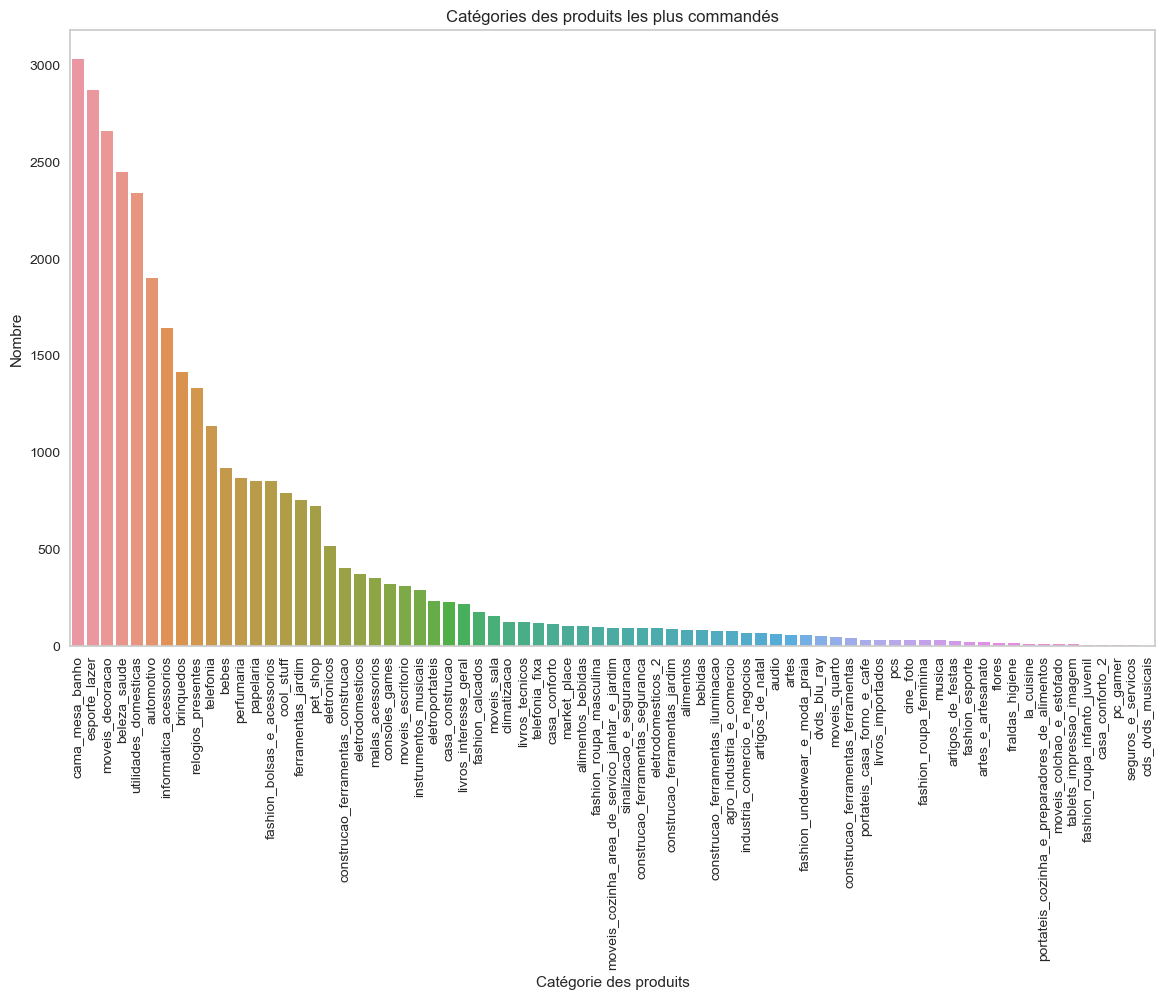

In [31]:
# catégories des produits les plus commandés
plt.figure(figsize=(14, 8))

sns.countplot(data=df_products, x='product_category_name',
              order=df_products.product_category_name
              .value_counts().index)

plt.title('Catégories des produits les plus commandés')
plt.ylabel('Nombre')
plt.xlabel('Catégorie des produits')

plt.xticks(rotation=90)
plt.yticks()
plt.grid(False)
plt.show()

## <span style='background:Thistle'>4. Imputation des valeurs manquantes</span>

In [32]:
def informations_valeurs_manqantes(df):
    print('Nombre de valeurs manquantes par colonne')
    msno.bar(df)
    print(100*'*')
    print('Matrice de chaleur des valeurs manquantes')
    msno.heatmap(df)
    print(100*'*')
    print('Dendogramme des valeurs manquantes')
    msno.dendrogram(df)
    print(100*'*')

Nombre de valeurs manquantes par colonne
****************************************************************************************************
Matrice de chaleur des valeurs manquantes
****************************************************************************************************
Dendogramme des valeurs manquantes
****************************************************************************************************


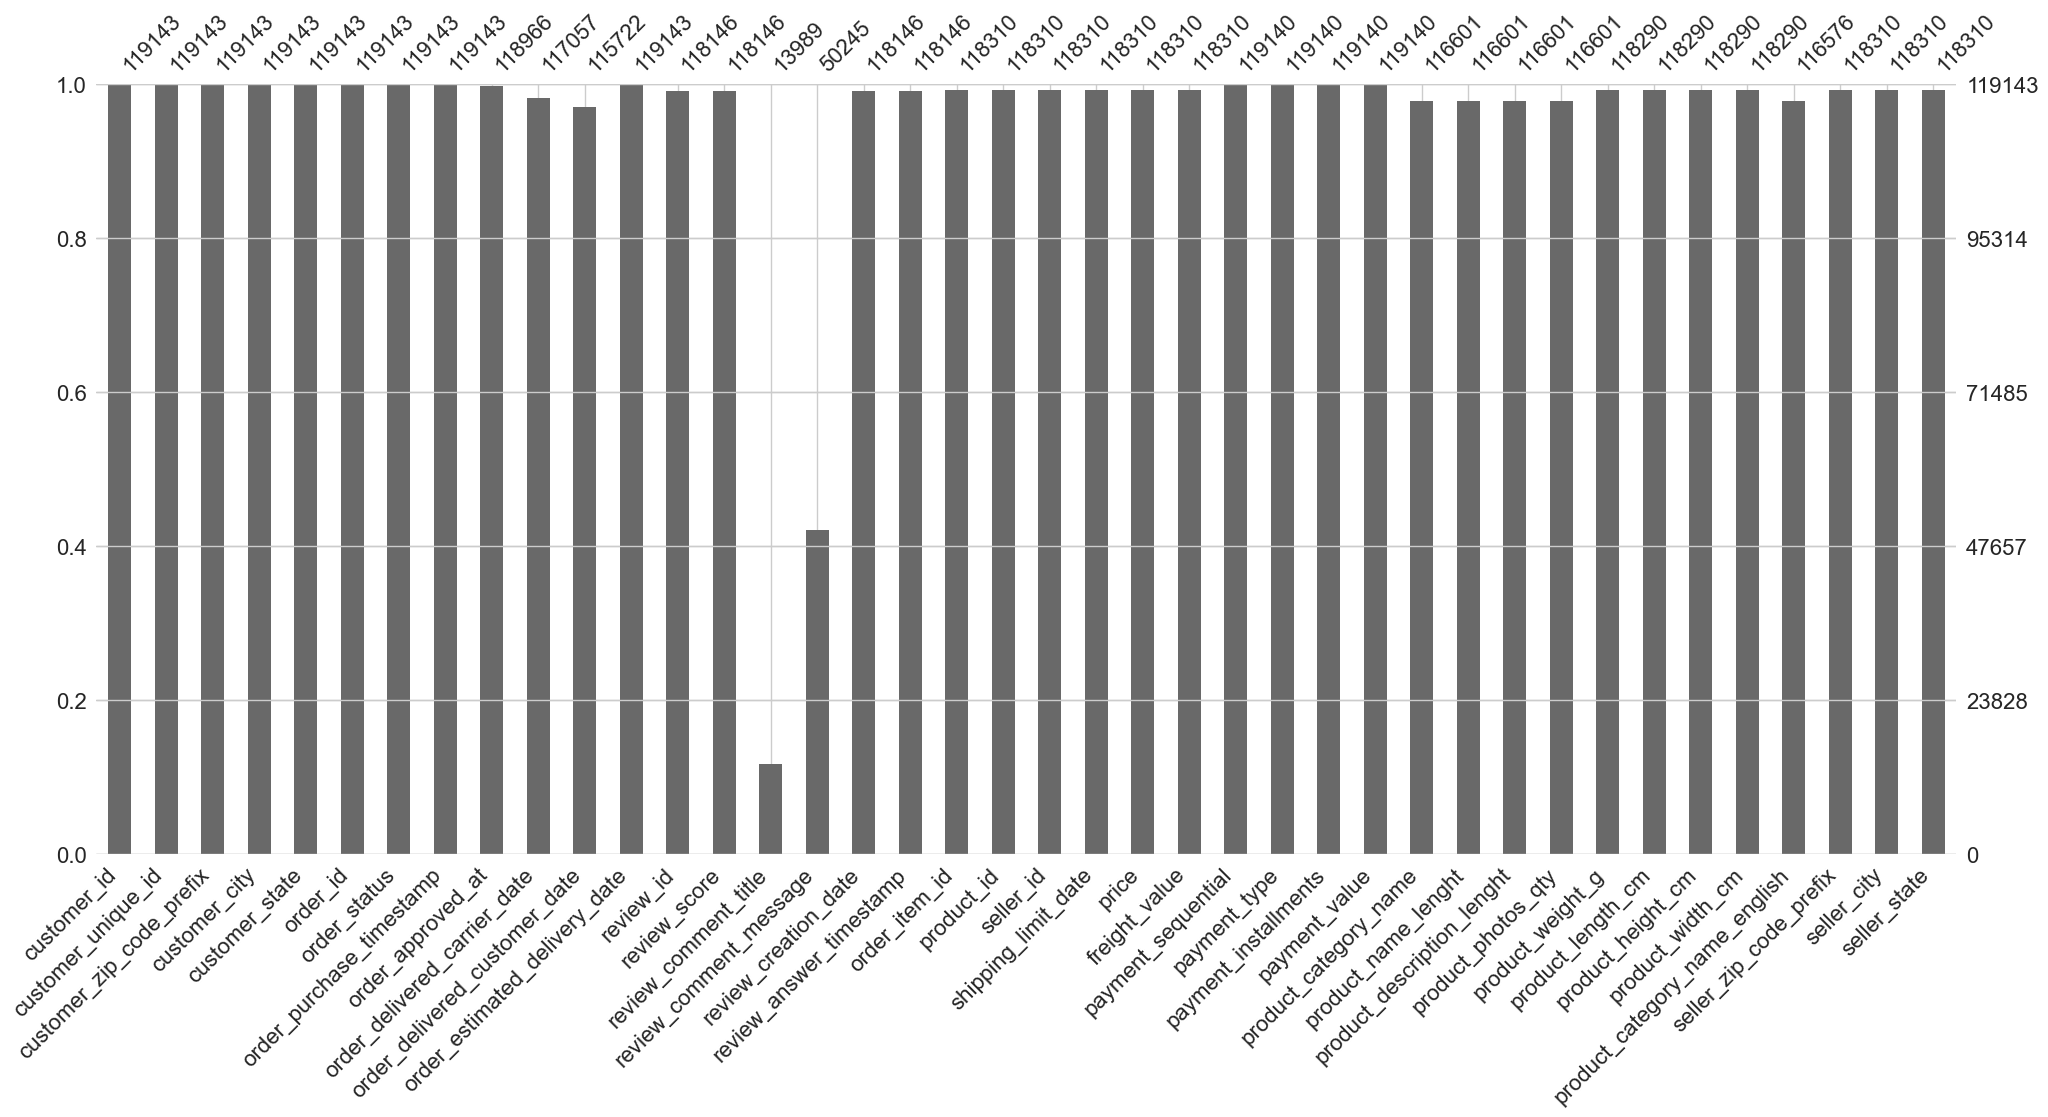

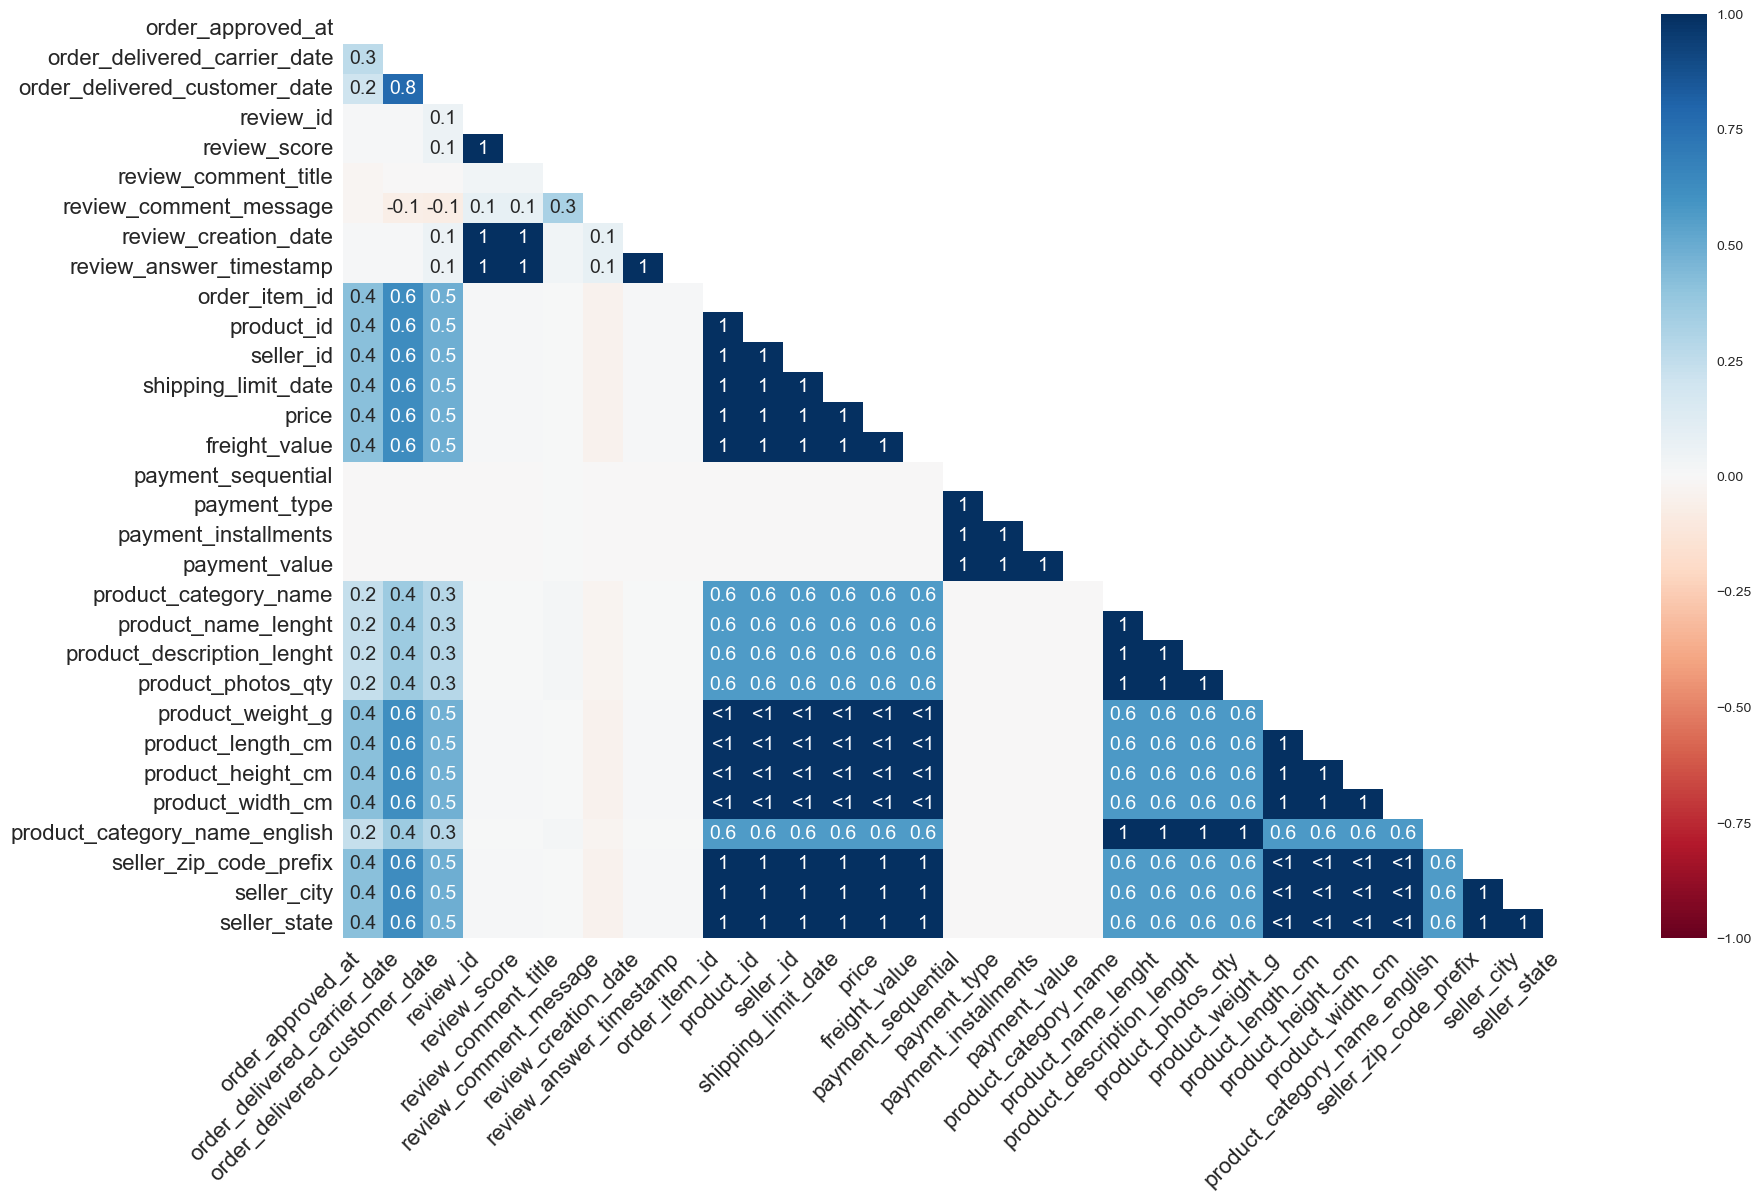

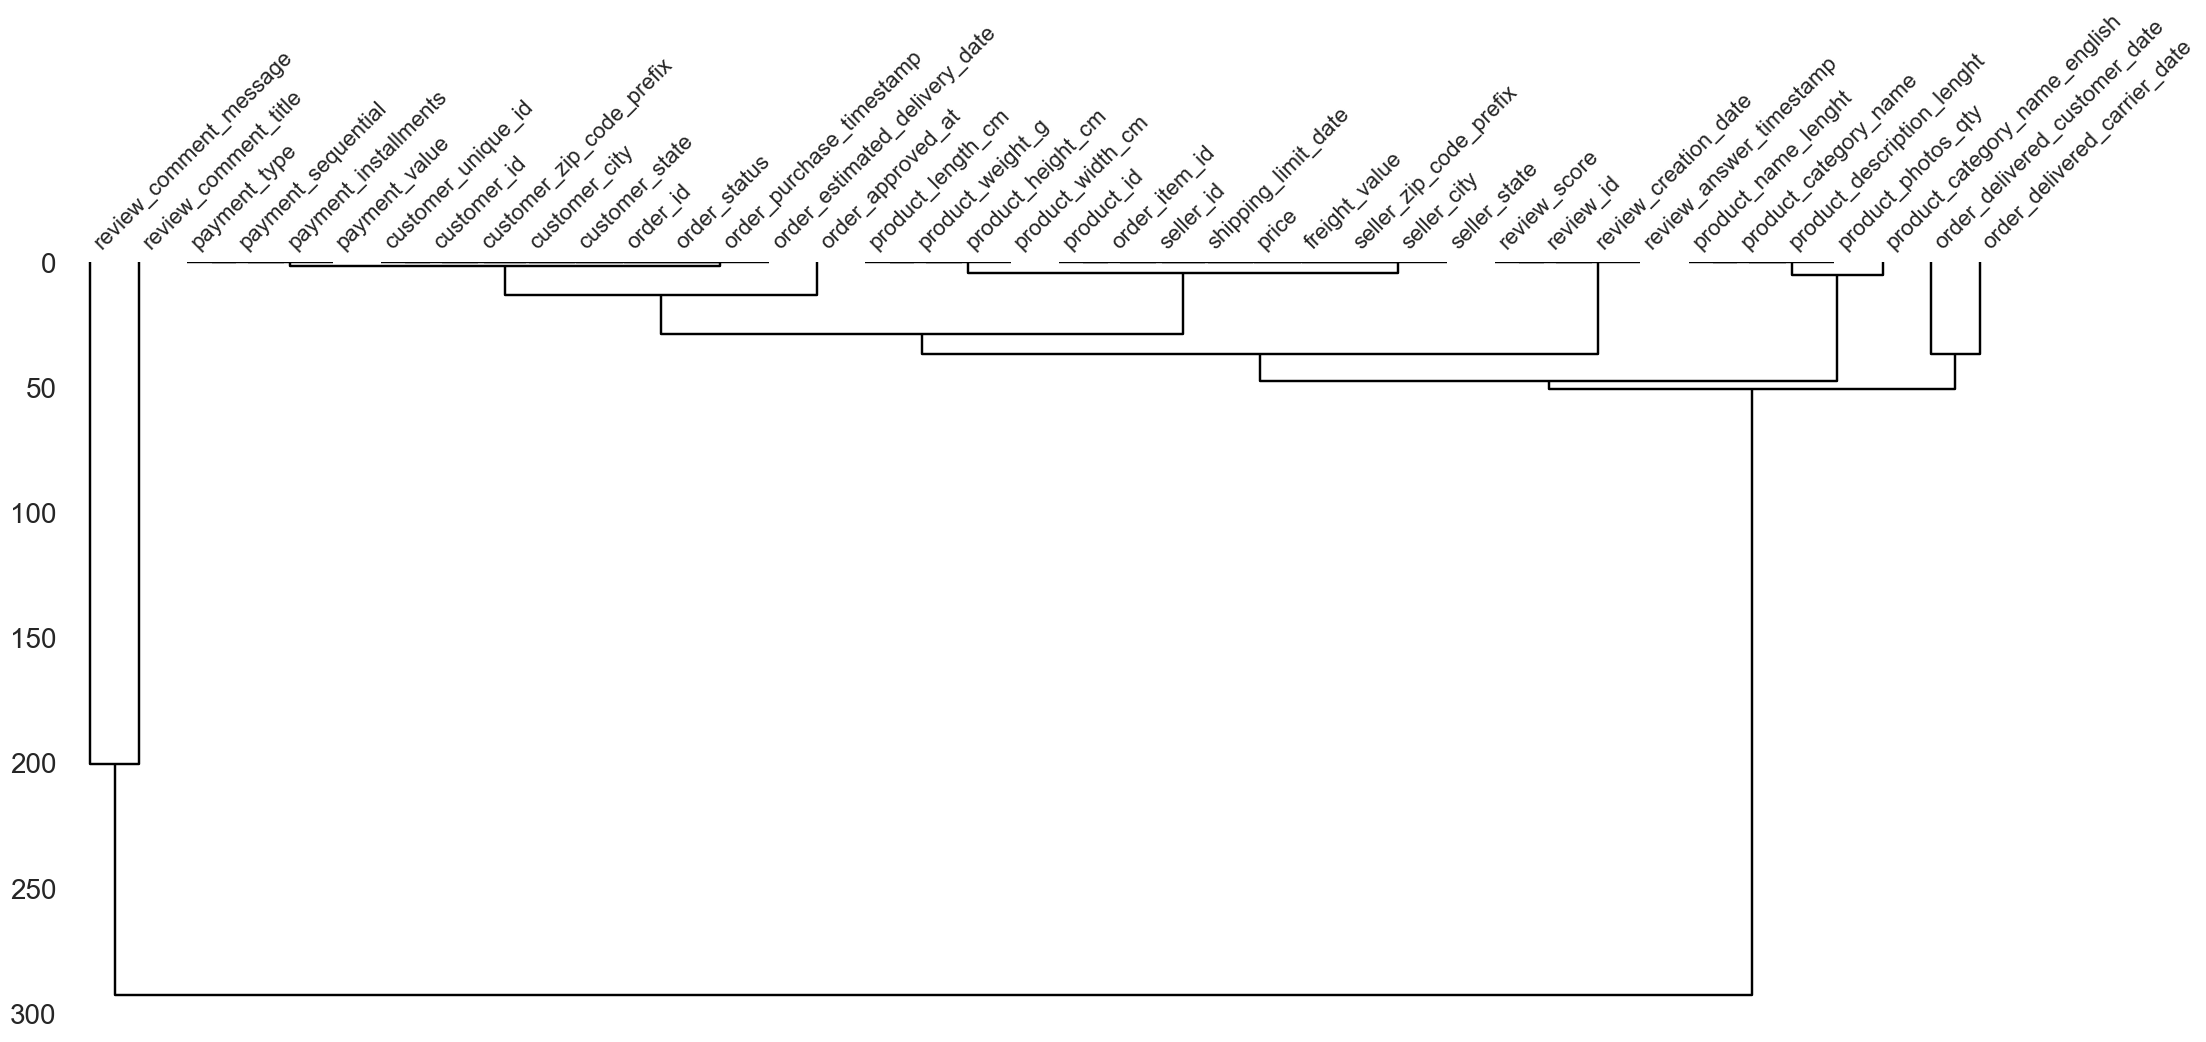

In [33]:
informations_valeurs_manqantes(data)

In [34]:
data = data.drop(['review_comment_title', 'review_comment_message'], 1)
data = data.dropna()

## <span style='background:Thistle'>5. Analyse valeur aberrante</span>

In [35]:
colonnes_numeriques = data.select_dtypes(include=[np.number]).columns.tolist()

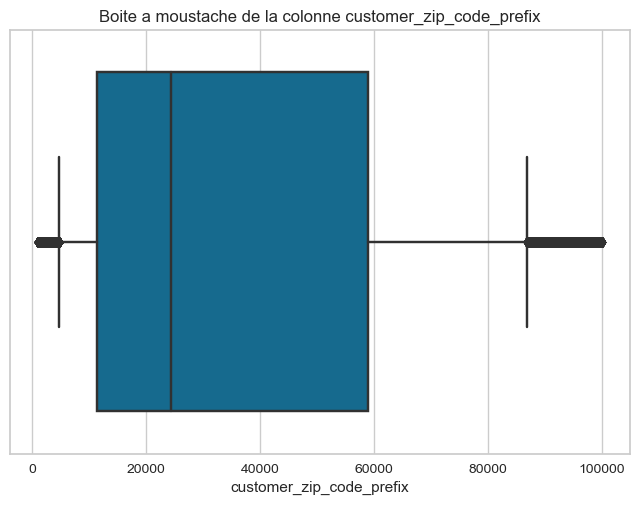

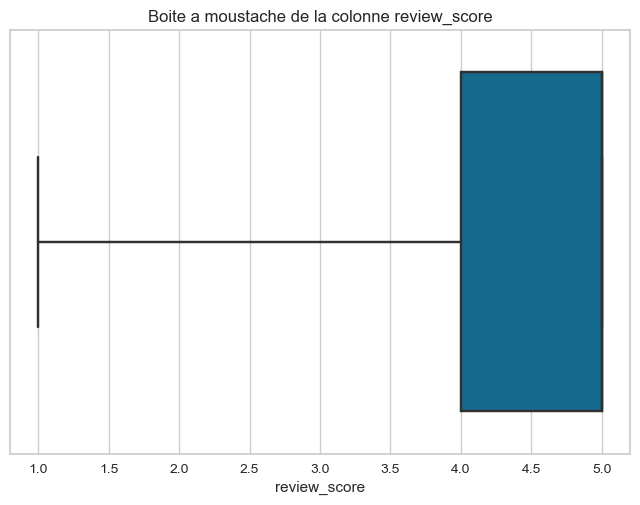

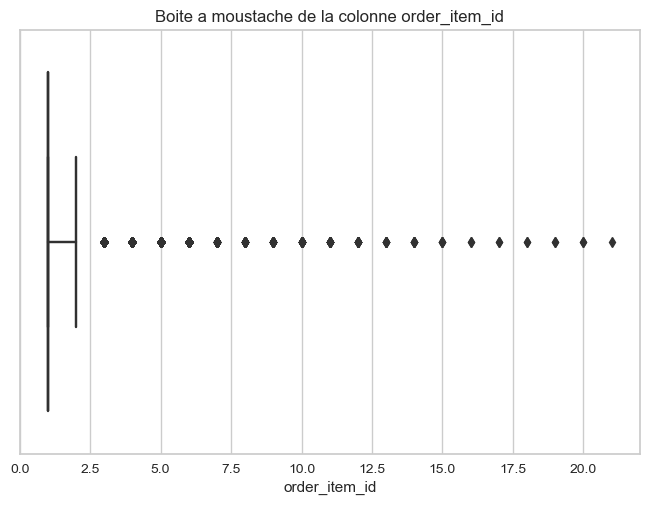

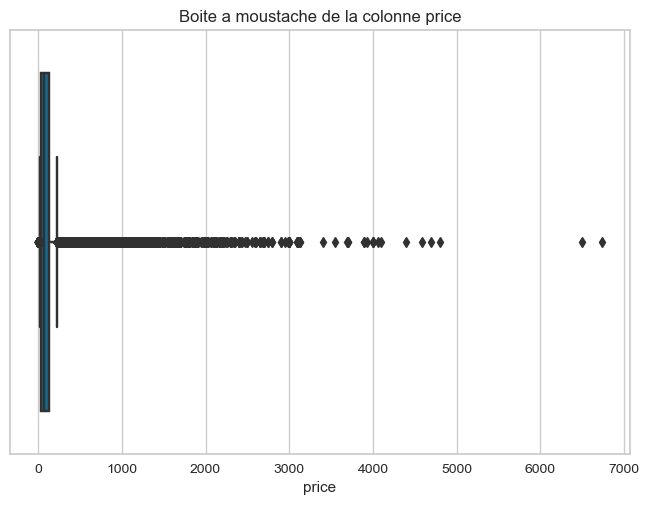

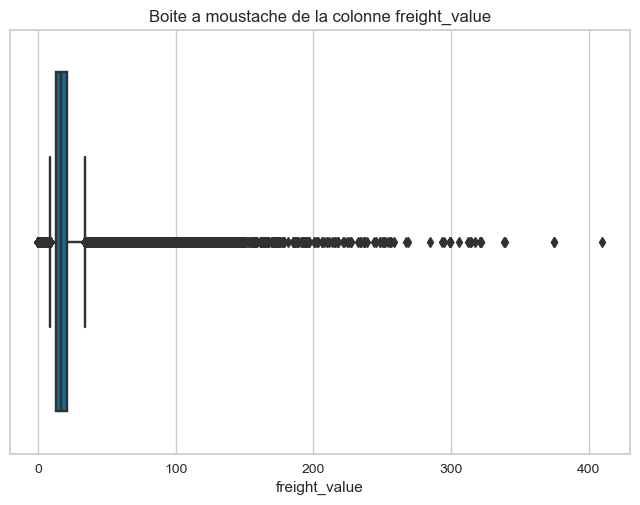

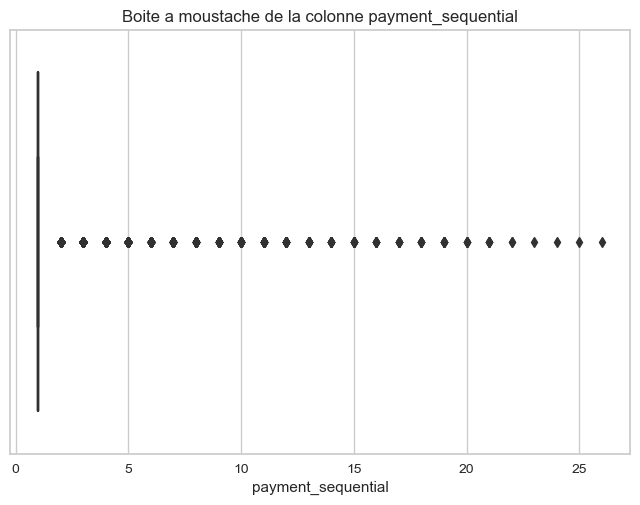

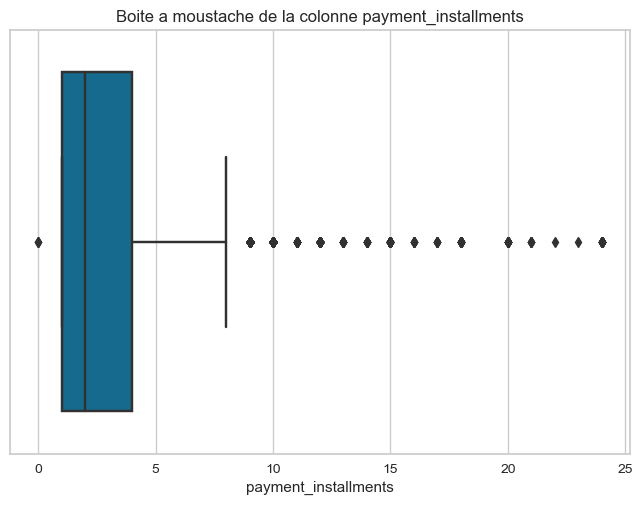

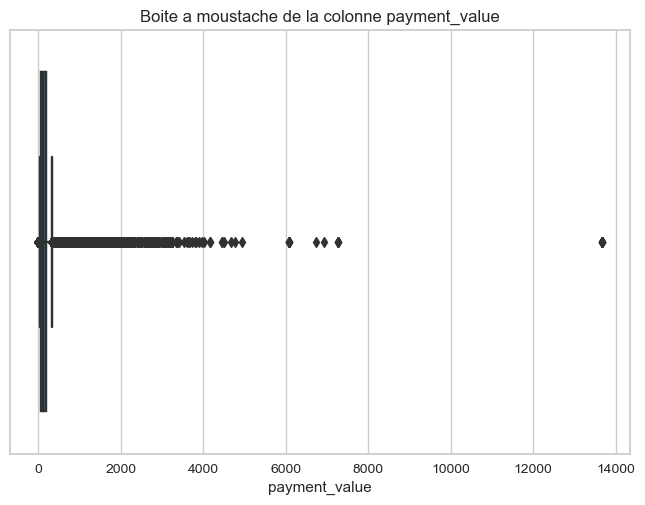

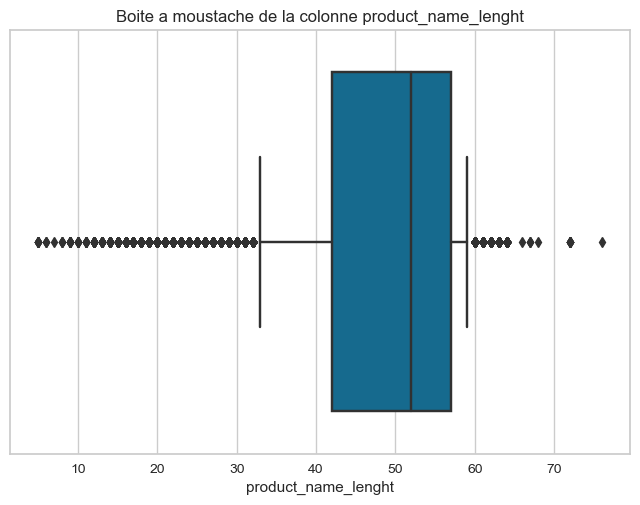

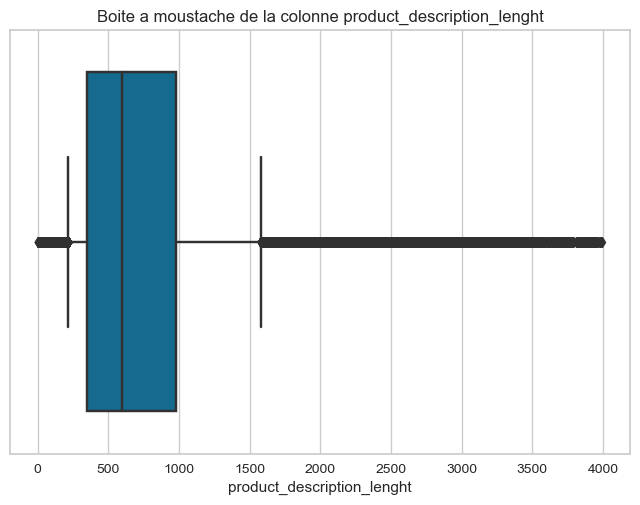

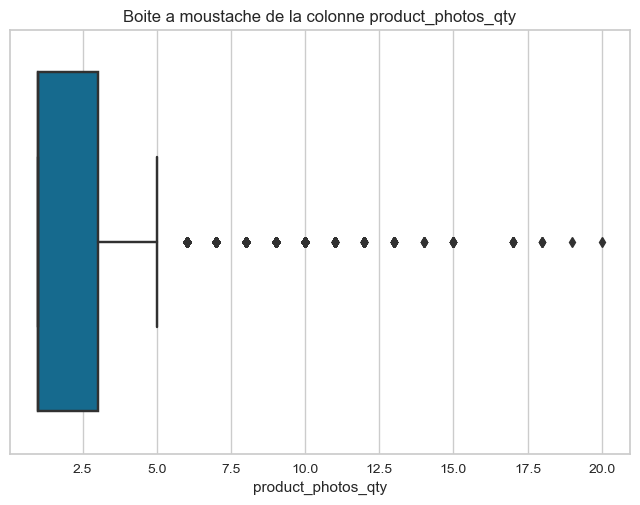

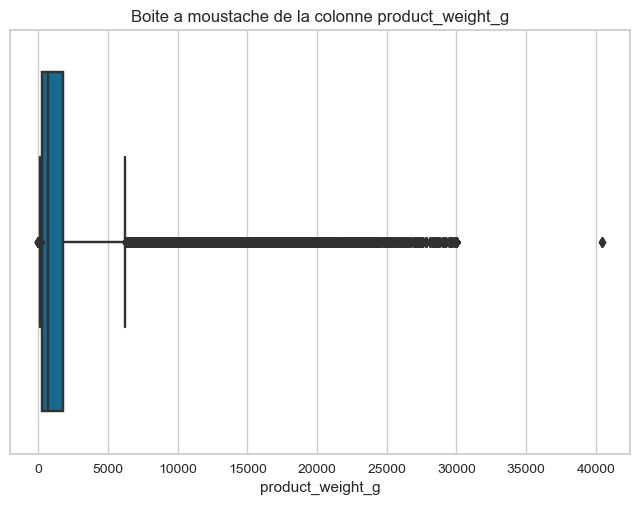

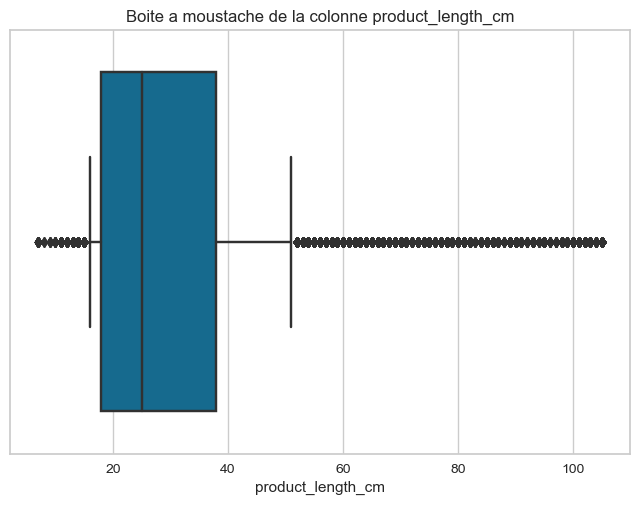

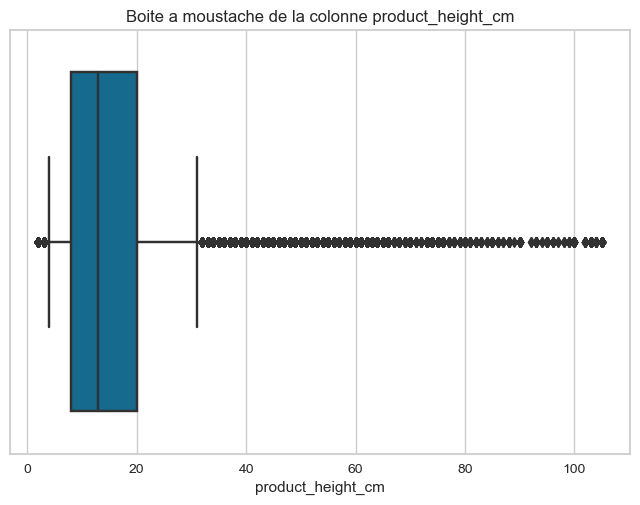

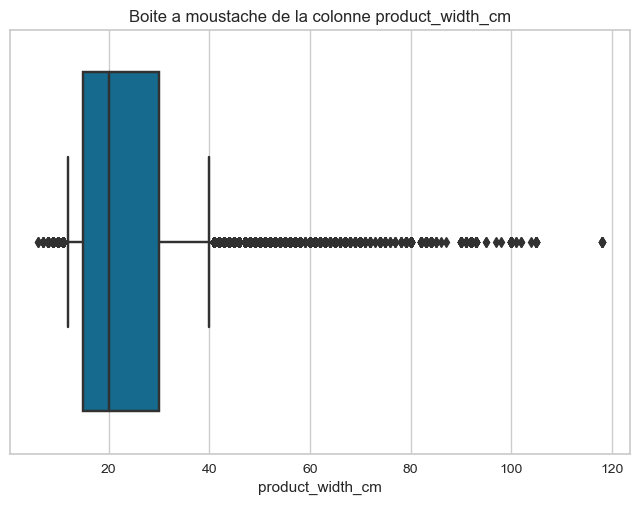

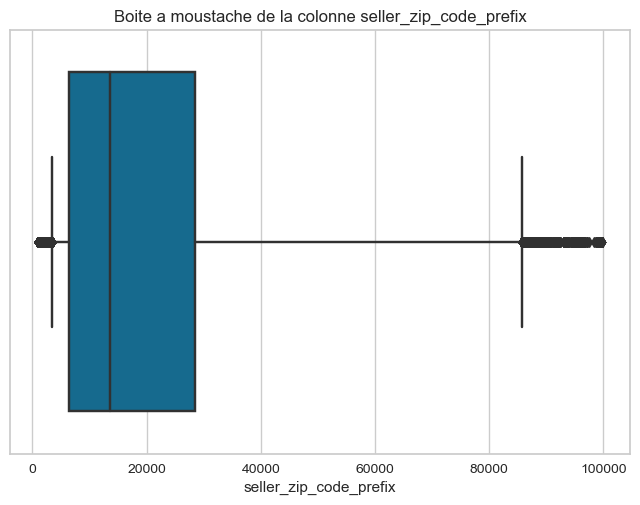

In [36]:
for colonne in colonnes_numeriques:
    sns.boxplot(x=colonne, data=data, whis=[10, 90])
    plt.title(('Boite a moustache de la colonne ' + colonne))
    plt.show()

D'après ces boites à moustaches, nous observons qu'il ya des valeurs aberrantes pour la majorité des colonnes. Je vais traiter ces valeurs aberranes par la méthode des quartiles (0.1 comme quartile inf et 0.9 comme quartile sup pour ne pas perdre beaucoups d'observations). Le nombre de clients ayant fait plus d'une commande  est d'environ 3%.

In [37]:
def traitement_valeurs_aberrantes(data, colonne):
    Q1 = data[colonne].quantile(0.1)
    Q3 = data[colonne].quantile(0.9)
    borneInf = Q1 - 1.5*(Q3 - Q1)
    borneSup = Q3 + 1.5*(Q3 - Q1)
    data.drop(data.loc[data[colonne] > borneSup].index, inplace=True)
    data.drop(data.loc[data[colonne] < borneInf].index, inplace=True)

In [38]:
for colonne in colonnes_numeriques:
    traitement_valeurs_aberrantes(data, colonne)

In [39]:
dataa = data.copy()

## <span style='background:Thistle'>6. Analyse univariée</span>

In [40]:
colonnes_numeriques.remove('order_item_id')
colonnes_numeriques.remove('payment_sequential')
colonnes_numeriques.remove('seller_zip_code_prefix')
colonnes_numeriques.remove('customer_zip_code_prefix')

In [41]:
def analyse_univariee(data, colonne, label):
    print(f'moyenne : {round(data[colonne].mean(), 2)}')
    print(f'mediane : {round(data[colonne].median(), 2)}')
    print(f'mode : {round(data[colonne].mode(), 2)}')
    print(f'variance : {round(data[colonne].var(), 2)}')
    print(f'skewness : {round(data[colonne].skew(), 2)}')
    print(f'kurtosis : {round(data[colonne].kurtosis(), 2)}')
    print(f'ecart type : {round(data[colonne].std(), 2)}')
    print(f'min : {round(data[colonne].min(), 2)}')
    print(f'25% : {round(data[colonne].quantile(0.25), 2)}')
    print(f'50% : {round(data[colonne].quantile(0.5), 2)}')
    print(f'75% : {round(data[colonne].quantile(0.75), 2)}')
    print(f'max : {round(data[colonne].max(), 2)}')
    print(colored('Interprétation', 'red', attrs=['bold']))
    if np.floor(data[colonne].skew()) == 0:
        print('la distribution de la colonne ' + colonne + ' est symétrique')
    elif round(data[colonne].skew(), 2) > 0:
        print('la distribution de la colonne ' + colonne +
              ' est étalée à droite')
    else:
        print('la distribution de la colonne ' + colonne +
              ' est étalée à gauche')
    if np.floor(data[colonne].kurtosis()) == 0:
        print('la distribution de la colonne ' + colonne +
              ' a le même aplatissement que la distribution normale')
    elif round(data[colonne].kurtosis(), 2) > 0:
        print('la distribution de la colonne ' + colonne +
              ' est moins aplatie que la distribution normale')
    else:
        print('la distribution de la colonne ' + colonne +
              ' est plus aplatie que la distribution normale')
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(data[colonne], width=0.5, color='red')
    plt.title('Boite a moustache de la colonne ' + label, fontsize=15)
    plt.subplot(1, 2, 2)
    sns.histplot(data[colonne], kde=True, color='blue')
    plt.title('histogramme de la colonne  ' + label, fontsize=15)
    plt.show()
    plt.tight_layout()

****************************************************************************************************
Analyse de la colonne review_score
moyenne : 4.11
mediane : 5.0
mode : 0    5.0
Name: review_score, dtype: float64
variance : 1.75
skewness : -1.4
kurtosis : 0.65
ecart type : 1.32
min : 1.0
25% : 4.0
50% : 5.0
75% : 5.0
max : 5.0
Interprétation
la distribution de la colonne review_score est étalée à gauche
la distribution de la colonne review_score a le même aplatissement que la distribution normale


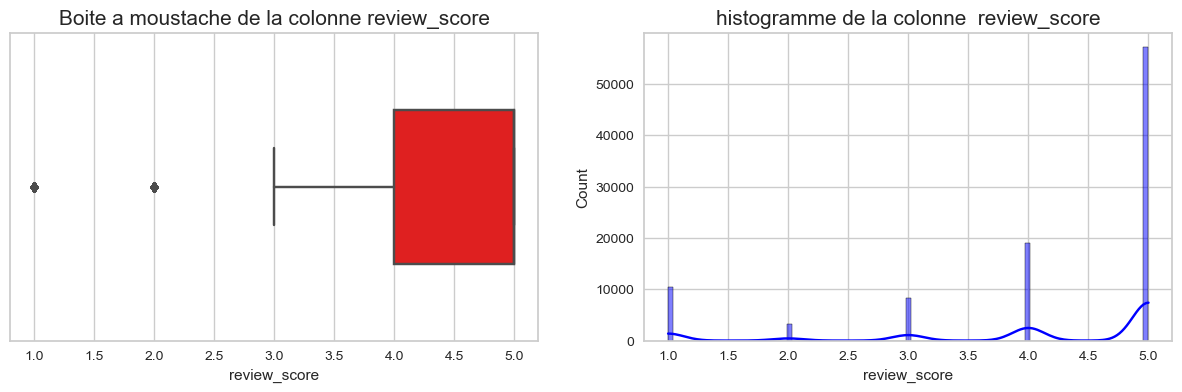

****************************************************************************************************
Analyse de la colonne price
moyenne : 93.15
mediane : 69.9
mode : 0    59.9
Name: price, dtype: float64
variance : 6391.81
skewness : 2.04
kurtosis : 5.39
ecart type : 79.95
min : 0.85
25% : 39.0
50% : 69.9
75% : 119.99
max : 538.0
Interprétation
la distribution de la colonne price est étalée à droite
la distribution de la colonne price est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

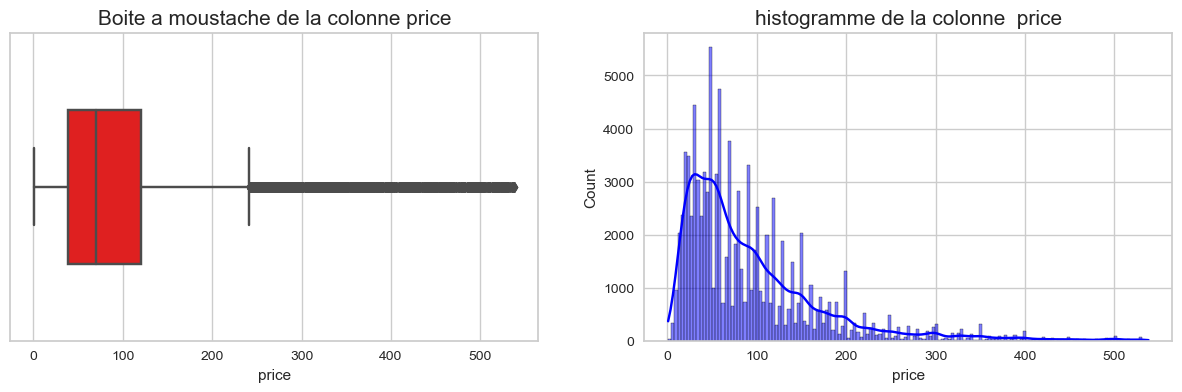

****************************************************************************************************
Analyse de la colonne freight_value
moyenne : 17.71
mediane : 16.02
mode : 0    15.1
Name: freight_value, dtype: float64
variance : 77.75
skewness : 1.97
kurtosis : 5.52
ecart type : 8.82
min : 0.0
25% : 12.82
50% : 16.02
75% : 19.6
max : 64.8
Interprétation
la distribution de la colonne freight_value est étalée à droite
la distribution de la colonne freight_value est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

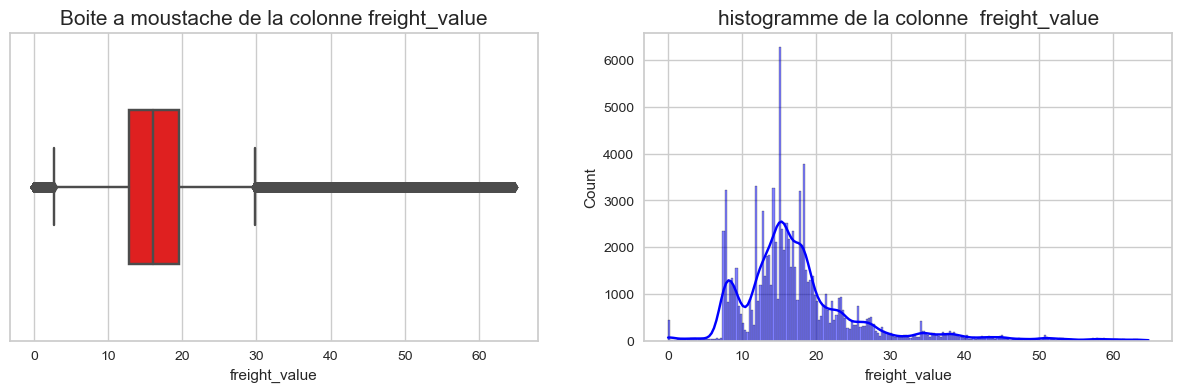

****************************************************************************************************
Analyse de la colonne payment_installments
moyenne : 2.84
mediane : 2.0
mode : 0    1.0
Name: payment_installments, dtype: float64
variance : 6.77
skewness : 1.57
kurtosis : 1.79
ecart type : 2.6
min : 1.0
25% : 1.0
50% : 2.0
75% : 4.0
max : 18.0
Interprétation
la distribution de la colonne payment_installments est étalée à droite
la distribution de la colonne payment_installments est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

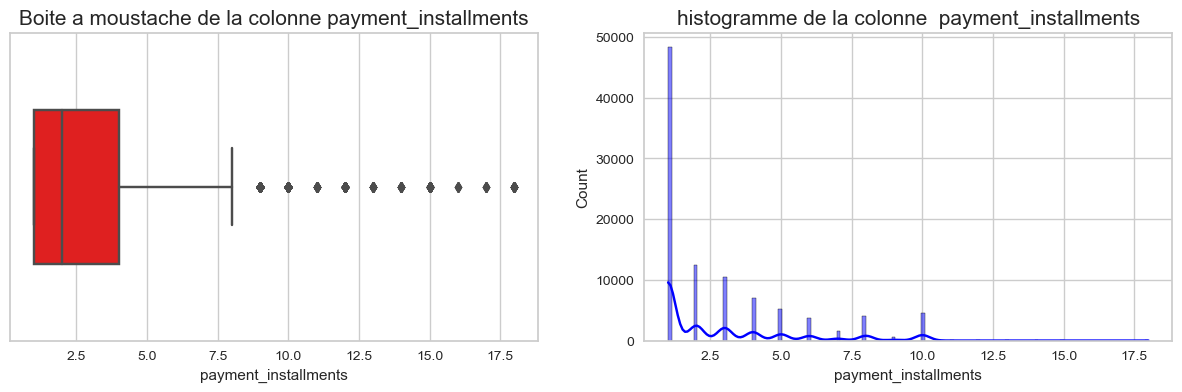

****************************************************************************************************
Analyse de la colonne payment_value
moyenne : 131.32
mediane : 102.85
mode : 0    77.57
Name: payment_value, dtype: float64
variance : 10204.37
skewness : 1.73
kurtosis : 3.49
ecart type : 101.02
min : 0.01
25% : 60.7
50% : 102.85
75% : 169.05
max : 640.28
Interprétation
la distribution de la colonne payment_value est étalée à droite
la distribution de la colonne payment_value est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

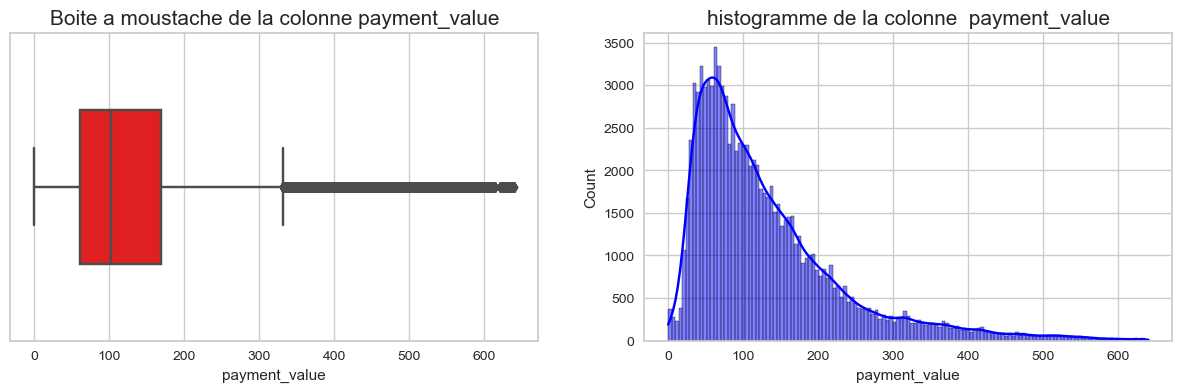

****************************************************************************************************
Analyse de la colonne product_name_lenght
moyenne : 48.85
mediane : 52.0
mode : 0    59.0
Name: product_name_lenght, dtype: float64
variance : 100.14
skewness : -0.93
kurtosis : 0.2
ecart type : 10.01
min : 5.0
25% : 43.0
50% : 52.0
75% : 57.0
max : 76.0
Interprétation
la distribution de la colonne product_name_lenght est étalée à gauche
la distribution de la colonne product_name_lenght a le même aplatissement que la distribution normale


<Figure size 800x550 with 0 Axes>

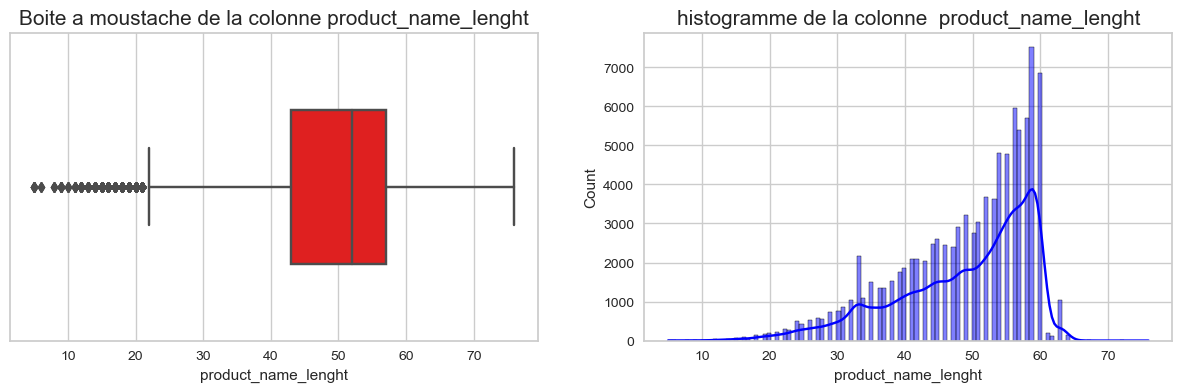

****************************************************************************************************
Analyse de la colonne product_description_lenght
moyenne : 744.59
mediane : 586.0
mode : 0    341.0
Name: product_description_lenght, dtype: float64
variance : 338737.32
skewness : 1.75
kurtosis : 3.55
ecart type : 582.01
min : 4.0
25% : 341.0
50% : 586.0
75% : 940.0
max : 3522.0
Interprétation
la distribution de la colonne product_description_lenght est étalée à droite
la distribution de la colonne product_description_lenght est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

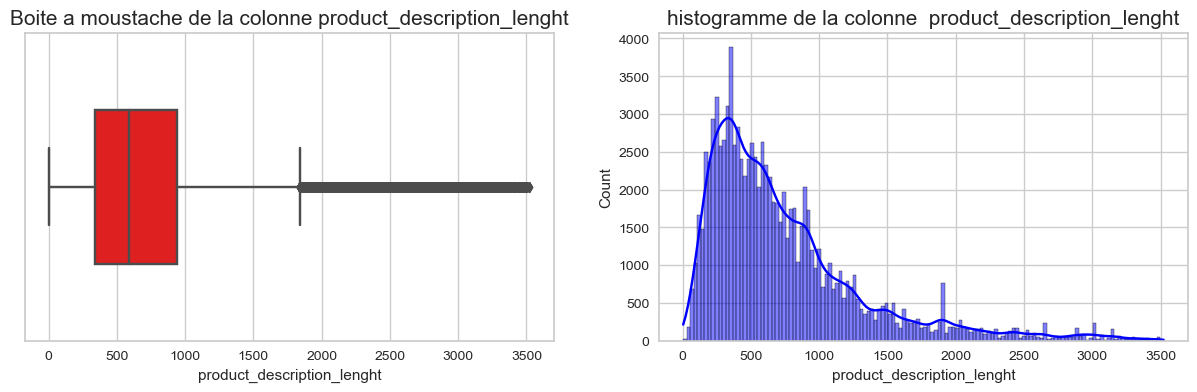

****************************************************************************************************
Analyse de la colonne product_photos_qty
moyenne : 2.18
mediane : 1.0
mode : 0    1.0
Name: product_photos_qty, dtype: float64
variance : 2.79
skewness : 1.73
kurtosis : 3.08
ecart type : 1.67
min : 1.0
25% : 1.0
50% : 1.0
75% : 3.0
max : 11.0
Interprétation
la distribution de la colonne product_photos_qty est étalée à droite
la distribution de la colonne product_photos_qty est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

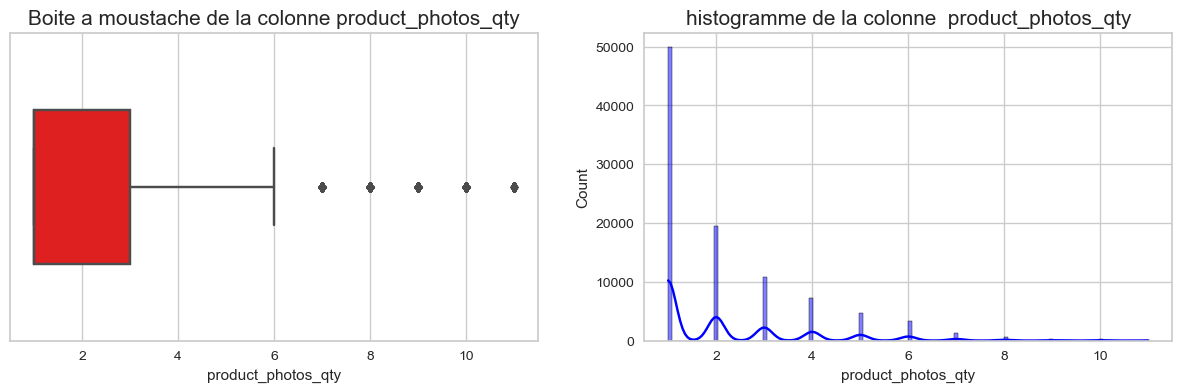

****************************************************************************************************
Analyse de la colonne product_weight_g
moyenne : 1502.83
mediane : 600.0
mode : 0    200.0
Name: product_weight_g, dtype: float64
variance : 4954529.73
skewness : 2.63
kurtosis : 6.92
ecart type : 2225.88
min : 0.0
25% : 254.0
50% : 600.0
75% : 1563.0
max : 12900.0
Interprétation
la distribution de la colonne product_weight_g est étalée à droite
la distribution de la colonne product_weight_g est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

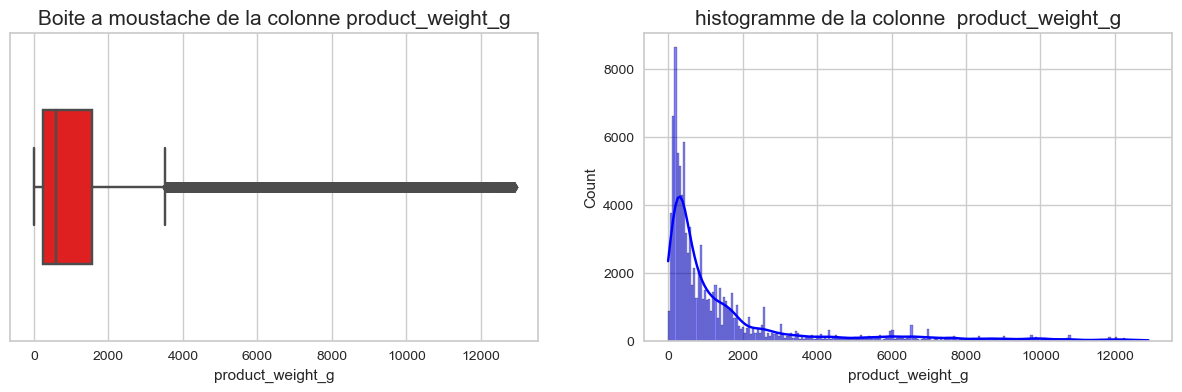

****************************************************************************************************
Analyse de la colonne product_length_cm
moyenne : 29.06
mediane : 24.0
mode : 0    16.0
Name: product_length_cm, dtype: float64
variance : 215.23
skewness : 1.67
kurtosis : 3.41
ecart type : 14.67
min : 7.0
25% : 18.0
50% : 24.0
75% : 36.0
max : 101.0
Interprétation
la distribution de la colonne product_length_cm est étalée à droite
la distribution de la colonne product_length_cm est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

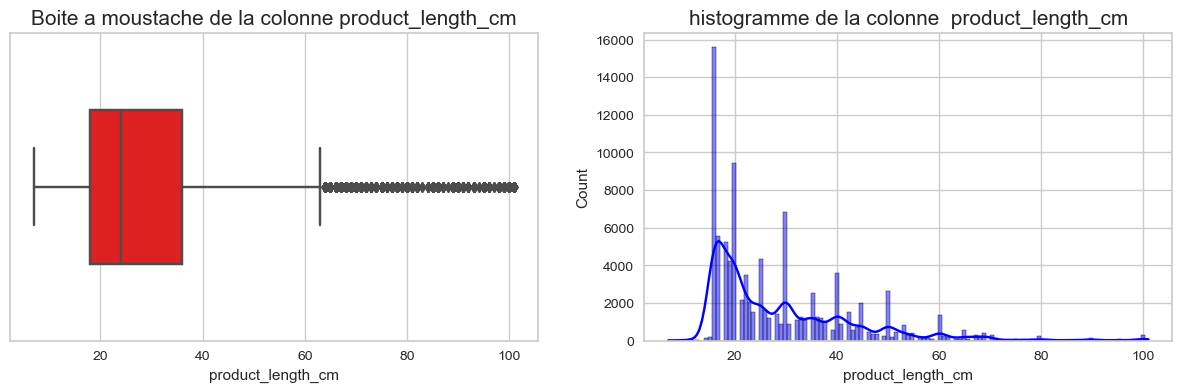

****************************************************************************************************
Analyse de la colonne product_height_cm
moyenne : 15.15
mediane : 12.0
mode : 0    10.0
Name: product_height_cm, dtype: float64
variance : 118.59
skewness : 1.68
kurtosis : 3.68
ecart type : 10.89
min : 2.0
25% : 8.0
50% : 12.0
75% : 20.0
max : 69.0
Interprétation
la distribution de la colonne product_height_cm est étalée à droite
la distribution de la colonne product_height_cm est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

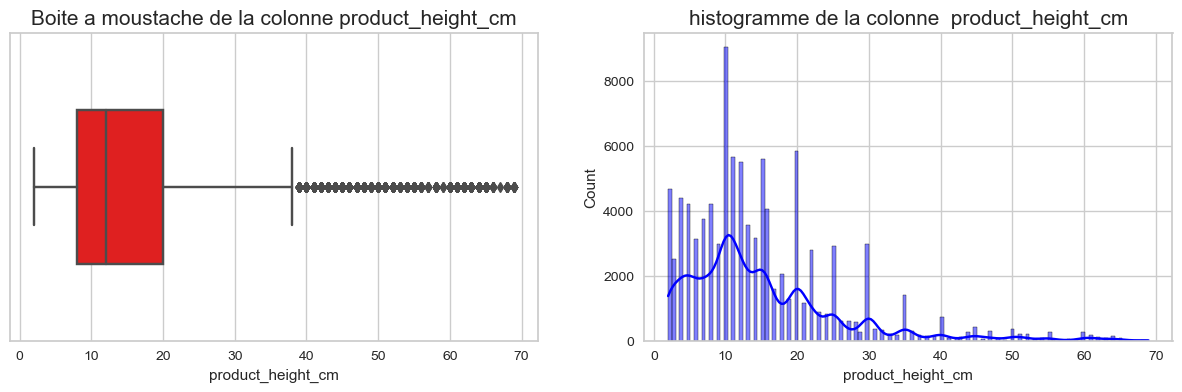

****************************************************************************************************
Analyse de la colonne product_width_cm
moyenne : 22.15
mediane : 20.0
mode : 0    20.0
Name: product_width_cm, dtype: float64
variance : 106.53
skewness : 1.29
kurtosis : 1.7
ecart type : 10.32
min : 6.0
25% : 15.0
50% : 20.0
75% : 29.0
max : 74.0
Interprétation
la distribution de la colonne product_width_cm est étalée à droite
la distribution de la colonne product_width_cm est moins aplatie que la distribution normale


<Figure size 800x550 with 0 Axes>

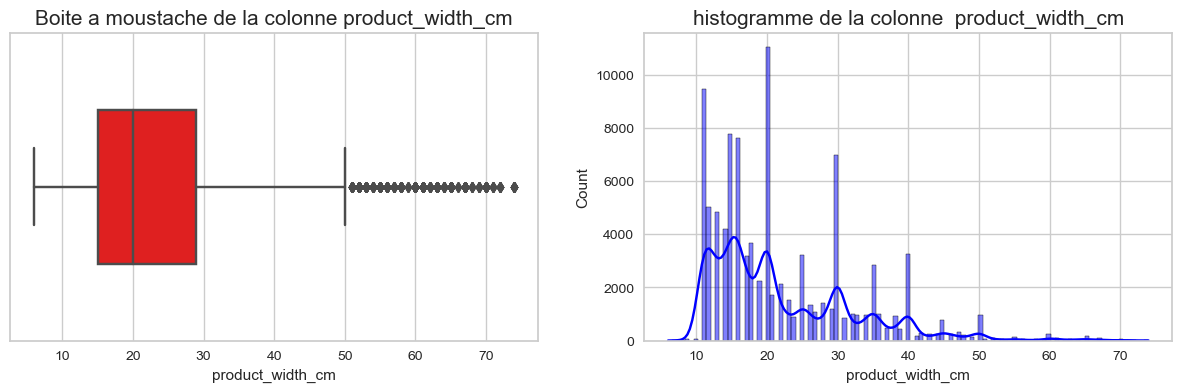

******************************************************************************************************************************************************


<Figure size 800x550 with 0 Axes>

In [42]:
for colonne in colonnes_numeriques:
    print(colored(100*'*', 'blue', attrs=['bold']))
    print(colored('Analyse de la colonne ' + colonne, 'red', attrs=['bold']))
    analyse_univariee(data, colonne, str(colonne))
print(colored(150*'*', 'blue', attrs=['bold']))

## <span style='background:Thistle'>7. Analyse multivariée</span>

In [43]:
def matrice_correlation(data, colonnes_a_analyser):
    plt.rcParams["figure.figsize"] = [15, 7]
    data = data[colonnes_a_analyser]
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", mask=mask)
    plt.title('matrice de corrélation entre les colonnes ')
    plt.show()

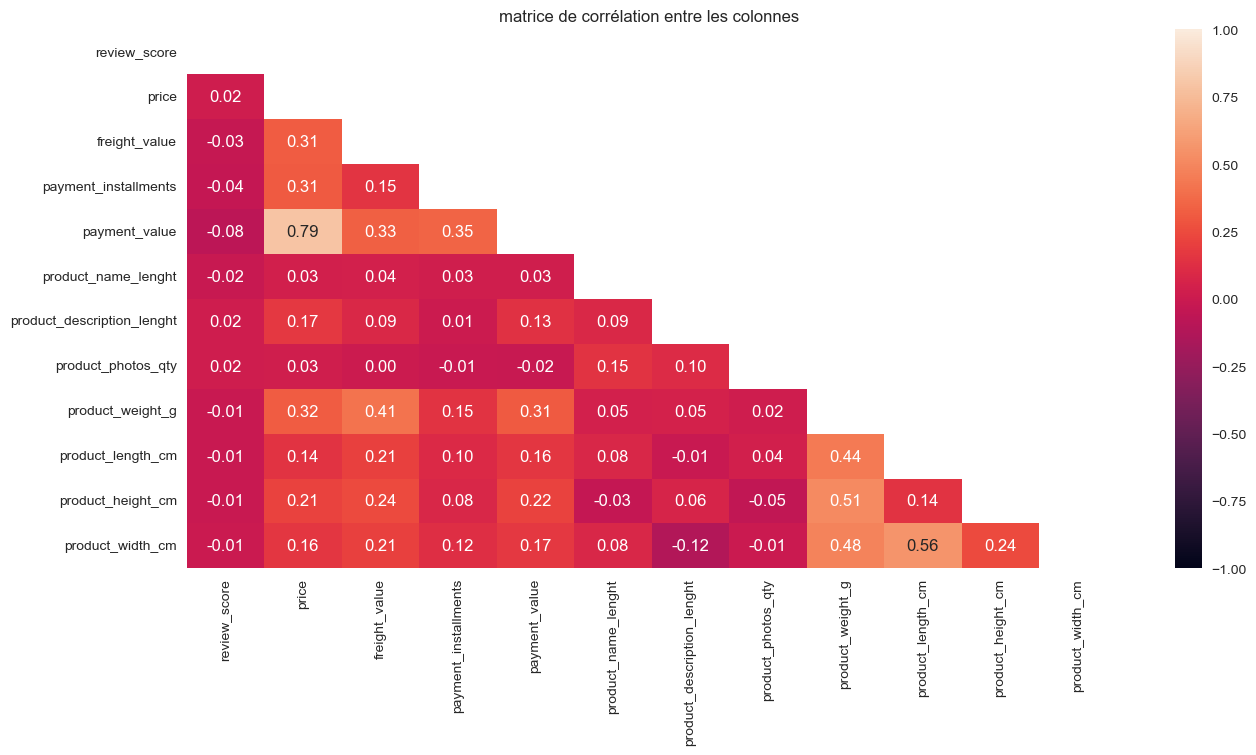

In [44]:
matrice_correlation(data, colonnes_numeriques)

D'après la matrice de corrélation, nous remarquons une forte corrélation entre payment_value et price.

Il faut supprimer l'une de ces variables ou en créer des nouvelles

## <span style='background:Thistle'>8. Sélection des colonnes utiles</span>

In [45]:
data = dataa[['customer_unique_id', 'customer_state',
              'order_id', 'order_purchase_timestamp',
              'order_delivered_customer_date', 'product_id',
              'price', 'payment_value', 'payment_type',
              'freight_value', 'payment_installments', 'product_length_cm',
              'product_height_cm', 'product_width_cm',
              'review_score', 'product_category_name_english']].copy()

In [46]:
def val_colonne(colonne):
    print('nbre_valeurs : ', data[colonne].nunique())
    if data[colonne].dtypes != 'object':
        print('Liste_valeurs : ', sorted(data[colonne].unique().tolist()))
    else:
        print('Liste_valeurs : ', data[colonne].unique().tolist())

In [47]:
val_colonne('product_category_name_english')

nbre_valeurs :  71
Liste_valeurs :  ['office_furniture', 'housewares', 'home_confort', 'sports_leisure', 'computers_accessories', 'toys', 'furniture_decor', 'auto', 'air_conditioning', 'telephony', 'health_beauty', 'garden_tools', 'pet_shop', 'baby', 'bed_bath_table', 'watches_gifts', 'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art', 'stationery', 'fashio_female_clothing', 'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff', 'fashion_bags_accessories', 'home_construction', 'luggage_accessories', 'electronics', 'home_appliances_2', 'fashion_male_clothing', 'small_appliances_home_oven_and_coffee', 'books_general_interest', 'costruction_tools_tools', 'home_appliances', 'small_appliances', 'musical_instruments', 'construction_tools_construction', 'music', 'fashion_underwear_beach', 'dvds_blu_ray', 'food', 'fixed_telephony', 'furniture_living_room', 'tablets_printing_image', 'market_place', 'christmas_supplies', 'agro_industry_and_commerce', 'cos

In [48]:
# Le nombre de catégories est 71. C'est beaucoup.
# Il faut créer un dictionnaire pour regrouper les catégories
%pycodestyle_off
dict_categories = {
            'la_cuisine':'home',
            'small_appliances_home_oven_and_coffee':'home',
            'home_comfort_2':'home',
            'home_appliances_2':'home',
            'furniture_mattress_and_upholstery':'home',
            'bed_bath_table':'home', 
            'kitchen_dining_laundry_garden_furniture':'home',            
            'furniture_living_room':'home',
            'furniture_bedroom':'home',
            'small_appliances':'home',           
            'home_appliances':'home',
            'home_confort':'home',
            'fashion_male_clothing':'fashion',
            'fashio_female_clothing':'fashion',
            'fashion_sport':'fashion',
            'fashion_childrens_clothes':'fashion',
            'fashion_shoes':'fashion',
            'fashion_underwear_beach':'fashion',
            'sports_leisure':'fashion',
            'fashion_bags_accessories':'fashion',
            'furniture_decor':'fashion',
            'luggage_accessories':'fashion',
            'security_and_services':'tools',
            'arts_and_craftmanship':'tools',
            'signaling_and_security':'tools',
            'construction_tools_safety':'tools',
            'industry_commerce_and_business':'tools',
            'home_construction':'tools',
            'costruction_tools_tools':'tools',
            'garden_tools':'tools',
            'air_conditioning':'tools',     
            'construction_tools_lights':'tools',           
            'construction_tools_construction':'tools',           
            'costruction_tools_garden':'tools',
            'auto':'tools',
            'computers_accessories':'multimedia',
            'dvds_blu_ray':'multimedia',
            'audio':'multimedia',
            'musical_instruments':'multimedia',
            'art':'multimedia',
            'consoles_games':'multimedia',
            'books_imported':'multimedia',
            'cds_dvds_musicals':'multimedia',
            'music':'multimedia',
            'computers':'multimedia',
            'books_general_interest':'multimedia',
            'books_technical':'multimedia',
            'office_furniture':'multimedia',           
            'fixed_telephony':'multimedia',
            'tablets_printing_image':'multimedia',
            'stationery':'multimedia',
            'telephony':'multimedia',
            'cine_photo':'multimedia',     
            'watches_gifts':'multimedia',
            'electronics':'multimedia',
            'cine_photo':'multimedia',
            'flowers':'consumption',
            'food':'consumption',
            'agro_industry_and_commerce':'consumption',
            'diapers_and_hygiene':'consumption',
            'health_beauty':'consumption',
            'perfumery':'consumption',
            'party_supplies':'consumption',
            'toys':'consumption',
            'drinks':'consumption',
            'christmas_supplies':'consumption',
            'pet_shop':'consumption',
            'housewares':'consumption',
            'baby':'consumption',
            'food_drink':'consumption',
            'market_place':'consumption',                
            'cool_stuff':'consumption',
            }

In [49]:
%pycodestyle_on
data['product_category_name'] = data[
    'product_category_name_english'].replace(dict_categories)

In [50]:
val_colonne('product_category_name')

nbre_valeurs :  5
Liste_valeurs :  ['multimedia', 'consumption', 'home', 'fashion', 'tools']


In [51]:
val_colonne('customer_state')

nbre_valeurs :  27
Liste_valeurs :  ['SP', 'SC', 'PR', 'MG', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MS', 'CE', 'DF', 'RN', 'MA', 'PE', 'MT', 'AM', 'AL', 'RO', 'PB', 'TO', 'PI', 'AC', 'SE', 'RR', 'AP']


In [52]:
# Créer un dictionnaire pour regrouper les régions
dict_state = {
    "DF": "centre_ouest",
    "GO": "centre_ouest",
    "MS": "centre_ouest",
    "MT": "centre_ouest",
    "AL": "nord_est",
    "BA": "nord_est",
    "CE": "nord_est",
    "MA": "nord_est",
    "PE": "nord_est",
    "PB": "nord_est",
    "PI": "nord_est",
    "RN": "nord_est",
    "SE": "nord_est",
    "AC": "nord",
    "AM": "nord",
    "AP": "nord",
    "PA": "nord",
    "RO": "nord",
    "RR": "nord",
    "TO": "nord",
    "ES": "sud_est",
    "MG": "sud_est",
    "RJ": "sud_est",
    "SP": "sud_est",
    "PR": "sud",
    "RS": "sud",
    "SC": "sud",
    }

In [53]:
data['customer_state'] = data['customer_state'].replace(dict_state)

In [54]:
val_colonne('customer_state')

nbre_valeurs :  5
Liste_valeurs :  ['sud_est', 'sud', 'nord', 'centre_ouest', 'nord_est']


## <span style='background:Thistle'>9. Feature engineering</span>

Nouvelle variable nombre de commande

In [55]:
nbre_commande = pd.DataFrame(data.groupby(["customer_unique_id"])
                             ["order_id"].nunique())
nbre_commande.rename(columns={"order_id": "nbre_commande"}, inplace=True)
data = pd.merge(data, nbre_commande, on='customer_unique_id')

Nouvelle variable nombre de produits

In [56]:
nbre_produit = pd.DataFrame(data.groupby(["customer_unique_id"])
                            ["product_id"].count())
nbre_produit.rename(columns={"product_id": "nbre_produit"}, inplace=True)
data = pd.merge(data, nbre_produit, on='customer_unique_id')

Nouvelle variable montant des achats

In [57]:
# Montant total des achats par client
montant_achat = pd.DataFrame(data.groupby(['customer_unique_id'])
                             ['price'].sum())
montant_achat.rename(columns={"price": "montant_achat"},
                     inplace=True)
data = pd.merge(data, montant_achat, on='customer_unique_id')
montant_achat.head()

,montant_achat
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
0000f46a3911fa3c0805444483337064,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99
0004aac84e0df4da2b147fca70cf8255,180.00


Nouvelle variable note moyenne des reviews

In [58]:
# Montant total des achats par client
score_moyen = pd.DataFrame(data.groupby(['customer_unique_id'])
                           ['review_score'].mean())
score_moyen.rename(columns={"review_score": "score_moyen"},
                   inplace=True)
data = pd.merge(data, score_moyen, on='customer_unique_id')
score_moyen.head()

,score_moyen
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0


Nouvelle variable delai de livraison

In [59]:
%pycodestyle_off
var1 = 'order_purchase_timestamp'
var2 = 'order_delivered_customer_date'
var3 = 'delai_livraison'
data[var1] = pd.to_datetime(data[var1])
data[var2] = pd.to_datetime(data[var2])
data[var3] = (data[var2] - data[var1]).apply(lambda x:x.days)

In [60]:
%pycodestyle_on
data = data[['customer_unique_id', 'order_id', 'customer_state',
             'order_purchase_timestamp', 'payment_type', 'payment_value',
             'product_category_name',  'nbre_commande', 'nbre_produit',
             'montant_achat', 'score_moyen', 'delai_livraison']]

## <span style='background:Thistle'>10. Data Frame RFM</span>

In [61]:
data.head()

,customer_unique_id,order_id,customer_state,order_purchase_timestamp,payment_type,payment_value,product_category_name,nbre_commande,nbre_produit,montant_achat,score_moyen,delai_livraison
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,sud_est,2017-05-16 15:05:35,credit_card,146.87,multimedia,1,1,124.99,4.0,8
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,sud_est,2018-01-12 20:48:24,credit_card,335.48,consumption,1,1,289.00,5.0,16
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,sud_est,2018-05-19 16:07:45,credit_card,157.73,multimedia,1,1,139.94,5.0,26
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,sud_est,2018-03-13 16:06:38,credit_card,173.30,multimedia,1,1,149.94,5.0,14
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,sud_est,2018-07-29 09:51:30,credit_card,252.25,home,1,1,230.00,5.0,11


In [62]:
def clean(row):
    try:
        return pd.to_datetime(row['order_purchase_timestamp'],
                              format="%Y %m %d")
    except ValueError:
        data.drop(row.name, inplace=True, axis=0)


data['order_purchase_timestamp'] = data.apply(clean, axis=1)

In [63]:
date_recence_max = data['order_purchase_timestamp'].max()
date_recence_max_str = date_recence_max.strftime('%d/%m/%Y %Hh%m')
print(f'La data à partir de la quelle on va calculer\
      la récence en nombre de jours:', {date_recence_max_str})

La data à partir de la quelle on va calculer      la récence en nombre de jours: {'29/08/2018 15h08'}


In [64]:
# Récence = nombre de jours depuis le dernier achat
dict_rfm = {'order_purchase_timestamp': lambda x: (
    date_recence_max - x.max()).days}
dict_new_rfm = {'order_purchase_timestamp': 'recence'}

In [65]:
# Fréquence = nombre d'achat sur toute la période
dict_rfm['order_id'] = 'count'
dict_new_rfm['order_id'] = 'frequence'

In [66]:
# Montant = somme des paiements sur toute la période
dict_rfm['payment_value'] = 'sum'
dict_new_rfm['payment_value'] = 'montant'

In [67]:
# Dataframe RFM
df_rfm = data.groupby('customer_unique_id').agg(dict_rfm)
df_rfm.rename(columns=dict_new_rfm, inplace=True)
df_rfm.reset_index(inplace=True)
data = data.drop(['order_id', 'payment_value'], 1)

In [68]:
df_rfm.head()

,customer_unique_id,recence,frequence,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


## <span style='background:Thistle'>11. Analyse en composantes principales (ACP)</span>

In [69]:
data_acp = pd.merge(data, df_rfm, on='customer_unique_id')

In [70]:
colonnes_a_normaliser = data_acp.select_dtypes(include=[np.number])\
                        .columns.tolist()
data_a_normaliser = data_acp[colonnes_a_normaliser].copy()
scaler = preprocessing.StandardScaler()

data_a_normaliser = scaler.fit_transform(data_a_normaliser)
data_a_normaliser = pd.DataFrame(data_a_normaliser,
                                 columns=colonnes_a_normaliser,
                                 index=data_acp.index.to_list())
for colonne in colonnes_a_normaliser:
    data_acp[colonne] = data_a_normaliser[colonne]

In [71]:
colonnes_categoriques = ['customer_state', 'payment_type',
                         'product_category_name']

In [72]:
def encodage_categorielle(data, colonne):
    df_encodage = pd.get_dummies(data[colonne], prefix=colonne)
    return (df_encodage)

In [73]:
data_encodage_categorielle = pd.DataFrame(index=data_acp.index)
for colonne in colonnes_categoriques:
    df_encodage = encodage_categorielle(data_acp, colonne)
    data_encodage_categorielle = pd.concat([data_encodage_categorielle,
                                            df_encodage], axis=1)
data_acp = data_acp.drop(colonnes_categoriques, 1)
data_acp = pd.concat([data_acp, data_encodage_categorielle], axis=1)

In [74]:
data_acp = data_acp.drop('order_purchase_timestamp', 1)
data_acp = data_acp.set_index('customer_unique_id')
pca = decomposition.PCA(n_components=22)
pca.fit(data_acp)

PCA(n_components=22)

Pour avoir un affichage clair des ercles de corrélations, je vais renommer les colonnes avec des noms plus courts

In [75]:
%pycodestyle_off
data_acp.rename(columns={'nbre_commande':'nc', 'nbre_produit':'nb', 
                         'montant_achat':'ma', 'score_moyen':'S',
                         'delai_livraison':'L', 'recence':'R', 
                         'frequence':'F', 'montant':'M',
                         'customer_state_centre_ouest':'co', 
                         'customer_state_nord':'sn',
                         'customer_state_nord_est':'sne', 
                         'customer_state_sud':'ss',
                         'customer_state_sud_est':'sse', 
                         'payment_type_boleto':'pb',
                         'payment_type_credit_card':'pcc', 
                         'payment_type_debit_card':'pcd',
                         'payment_type_voucher':'pv', 
                         'product_category_name_consumption':'con',
                         'product_category_name_fashion':'fas', 
                         'product_category_name_home':'hom',
                         'product_category_name_multimedia':'mul', 
                         'product_category_name_tools':'too'}, 
                 inplace = True)

In [76]:
%pycodestyle_on
data_acp1 = pca.transform(data_acp)

<BarContainer object of 22 artists>

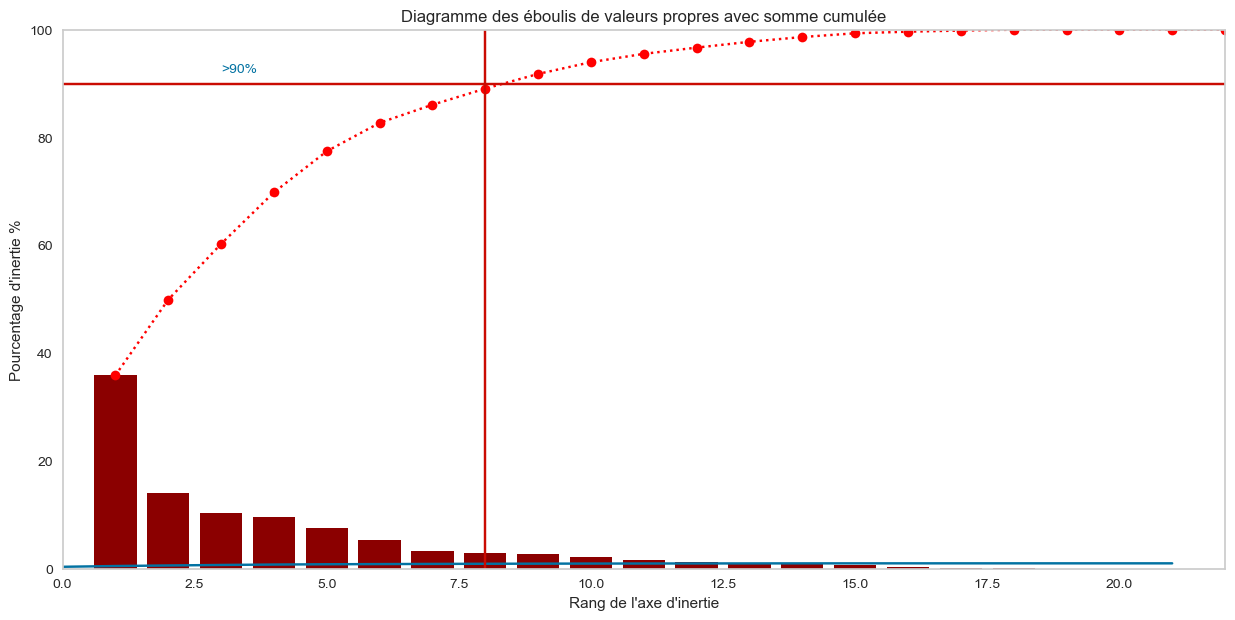

In [77]:
# diagramme d’éboulis des valeurs propres
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, len(cumsum)+1), cumsum*100, 'o:', color='red')
plt.xlim(0, 22)
plt.ylim(0, 100)
plt.grid()
plt.xlabel('Rang de l\'axe d\'inertie')
plt.ylabel('Pourcentage d\'inertie %')
#  trouver le moment où on attient 95% d'informations
plt.plot(cumsum)
# argmax pour > 90 %
nb_composantes_arret = np.argmax(cumsum > 0.90)
plt.axhline(y=90, color='r')
plt.text(3, 92, '>90%', color='b', fontsize=10)
plt.axvline(x=nb_composantes_arret, color='r')
plt.title('Diagramme des éboulis de valeurs propres avec somme cumulée')
plt.bar(np.arange(1, len(cumsum)+1), pca.explained_variance_ratio_*100,
        color='darkred')

La première composante du pca résume plus de 35% de l'informations.Les cinq dernières composantes résument peu d'informations(< 5%). Nous pouvons retenir seulement 8 composantes (on perd seulement 10% d'informations) et comme ça on arrive à réduire le nombre de variables de 22 à 8.

In [78]:
pca = decomposition.PCA(n_components=8)
pca.fit(data_acp)
data_acp1 = pca.transform(data_acp)
data_pca = pd.DataFrame(data_acp1)
col = ["pca " + str(n + 1) for n in data_pca.columns]
data_pca.columns = col
data_pca.head()

,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8
0,-0.631960,0.173970,1.357427,-0.320132,-0.625857,0.521393,0.044887,-0.765911
1,0.235491,0.030066,0.049592,-1.682564,0.817078,0.518250,0.369887,0.614680
2,-0.574936,0.501712,-0.726298,-0.376754,1.565723,-0.312375,0.237621,-0.679363
3,-0.529566,-0.297960,-0.294346,-0.569003,0.666145,0.043308,0.120817,-0.721985
4,-0.078505,-0.685363,-1.148045,-1.168697,0.692368,0.308217,0.235617,-0.211999


In [79]:
def cercle_correlation(pca, features, x, y):
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0, 0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02)

        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 features[i])

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1,
               round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(y+1,
               round(100*pca.explained_variance_ratio_[y], 1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)

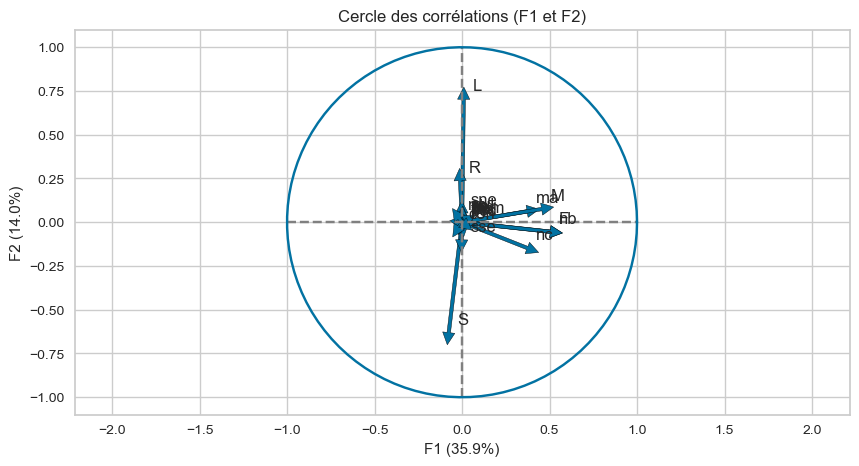

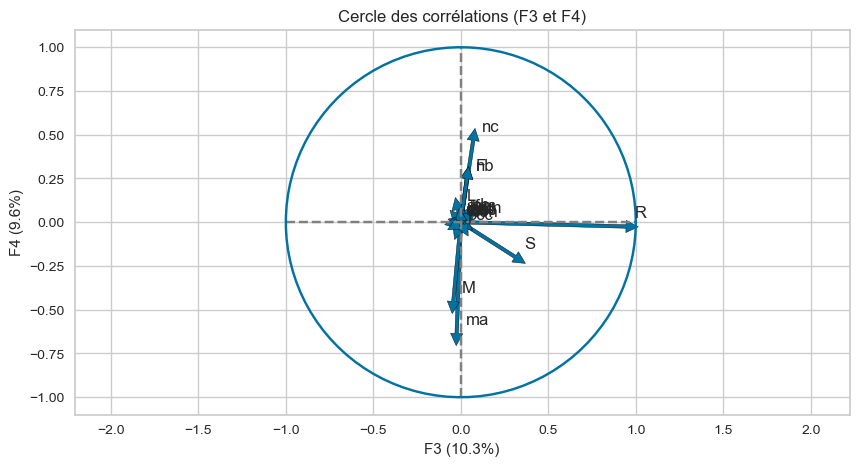

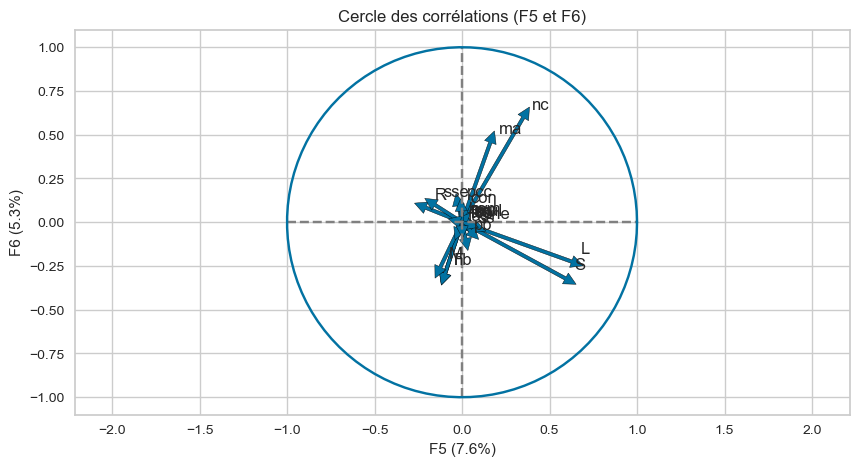

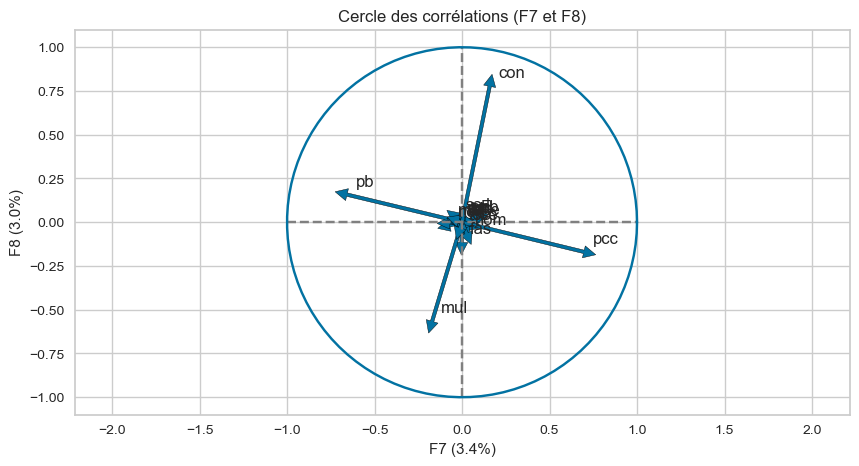

In [80]:
i = 0
while i < 7:
    cercle_correlation(pca, data_acp.columns.to_list(), i, i+1)
    i = i+2

D'aprés les cercles de corrélations, nous remarquons :

L'axe F1 contient les clients qui ont dépensé beaucoup et qui ont commandé plusieurs produits

L'axe F2 contient les clients qui ont un grand delai de livraison et ayant donné une mauvaise note

L'axe F3 contient les clients qui ont commandé dpuis longtemps et ont donné une bonne note

L'axe F4 contient les clients qui ont passé plusieurs commandes avec un montant faible

L'axe F5 contient les clients qui ont donné une bonne note malgrés le delai de livraison important

L'axe F6 contient les clients qui ont passé plusieurs commandes avec un grand montant d'achat

L'axe F7 contient les clients qui ont commandé avec une carte de crédit et non par boleto

L'axe F8 contient les clients qui ont commandé des produits de catégorie consumption et non multimédia

## <span style='background:Thistle'>12. Sauvegarde du jeu de données</span>

In [81]:
data.to_csv('data.cleaned.csv', index=False)
df_rfm.to_csv('df_rfm.csv', index=False)